### DSC630 Course Project Milestone 3: Preliminary Analysis
#### Madeleine Sharp

### Austin Animal Center's (AAC) Animal Outcomes

Each year, approximately 6.3 million companion animals enter U.S. animal shelters nationwide (ASPCA, 2022). Of those 6.3 million shelter animals, approximately 920,000 are euthanized annually (although, this number has declined within the past eleven years). While myriad shelters are not no-kill (and therefore, do euthanize animals past a certain time point), there are shelters in existence that are no-kill shelters and actively seek to try to do all they possibly can for an animal outside of euthanizing the animal.

One of these shelters is the Austin Animal Center (AAC) in Austin, TX. This shelter provides care and shelter to more than 18,000 animals annually and is also heavily involved in various activities and initiatives for the protection and care of abandoned, at-risk, or surrendered animals. The Austin Animal Center works with county, city, and state-wide parties on these efforts in an endeavor to better the lives and outcomes for those animals in need of care and a home.

Given the large number of animals residing in shelters, alongside the large number of those animals euthanized, finding rehoming solutions for animals and shelter pets in need is a critical and key issue for animal shelters across the nation. Even more so for those shelters that are no-kill shelters - given that they keep animals until they can be moved on to that next step of their lives, whether that be adoption, rehoming, shelter transfer, etc. Of course, and unfortunately, even at no-kill shelters, certain instances may exist in which an animal is euthanized due to being extremely sick or in extreme pain. Generally, however, this method is only proceeded with once all other potential methods have been considered or exhausted.

Solving this problem is imperative, and those who would most likely benefit from such an endeavor include the animals, people, facilities, structures, and institutions in the animal care sector/industry. Keeping pets off the streets and in good homes is imperative for the health and well-being of these animals. Additionally, their health and well-being has a ripple effect outwards towards all communities and institutions that serve animals or may be impacted (veterinary offices, animal control offices, animal shelters, public health offices, etc.). 

#### Data, Data Dictionary, and Variables:

As a part of Austin, Texas's Open Data Initiative efforts, the AAC has made its data available for public use. To obtain the data, there are a few components: the data itself (collected and managed by the AAC), extracting that data (via the Open Data Portal's API and the use of a Socrata script, which is what the API is powered by), and then structuring that data in such a way within a Python pandas dataframe for usage.

The various tools and resources I will be utilizing to obtain the data for this project include:
* https://data.austintexas.gov/
* https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238
* https://gist.github.com/aschleg/54bf7ed55c2383f3ba1f338b8116a77b
* https://data.austintexas.gov/resource/hcup-htgu.json
* SODA - the Socrata Open Data API (SODA), which provides programmatic access to the dataset for use (https://dev.socrata.com/consumers/getting-started.html).

This specific dataset's variables include:
* animal_id - This refers to the animal's specific ID number.
* datetime - Date and time of when the animal was admitted to the shelter.     
* monthyear - Month and year of when the animal was admitted to the shelter. 
* date_of_birth  - Date of birth of the animal, if known.  
* outcome_type - Outcome type, or classification. 
* outcome_subtype  - Outcome subtype (if exists), or classification.
* animal_type  - Type of animal (dog, cat, horse, etc.)   
* sex_upon_outcome  - Sex of the animal at the time of their "outcome."
* age_upon_outcome  - Age of the animal at the time of their "outcome."
* breed  - Animal's breed.         
* color - Color of animal's fur/coat.            
* name - Animal's name.

This data spans back to the year 2013 and up to the present date. It is a real-time and streaming dataset.

#### Obtaining and Extracting the Data:

As mentioned in the introduction, this data will be obtained through the use of the SODA API script (the API used to access the AAC data is powered by Socrata). This API has a call limit of 1,000, which means that the results will need to be garnered 1,000 results at a time (this is also noted within the API documentation on the website). 

Currently, the documentation on the Austin, TX AAC website page indicates that approximately 140K total rows/records exist within the dataset. 

First, to obtain the data, I will need to set the endoint, as defined in the API documentation on the website. Then, I will want to define the number of records to call (1,000) as well as the number of pages to "flip through" as I obtain all of this data. For pages, per the website, it looks like setting this at 200 will be most beneficial.

##### Import libraries.

In [1]:
## Import necessary libraries.
%matplotlib inline
import requests
import pandas as pd
import numpy as np
from urllib.error import HTTPError
import matplotlib.pyplot as plt

##### Set the URL endpoint.

In [2]:
## Set the endpoint and number of records for API call.
endpoint = 'https://data.austintexas.gov/resource/9t4d-g238.json'
count = 1000
pages = 200

##### Create loop to obtain and append AAC data results.

Next, after I have defined the above parameters, I will use the Python requests package library to get the results and then append those to a results list for easy "safe-keeping." Once the script has gone through the 1,000 records and returns a 404 error, the loop will stop and the results will be returned (from the list I appended them to).

While there are likely some (and probably better) ways to accomplish this task that may be of a higher caliber, this simple solution works well for my specific purposes.

Please note: Given the number of records, this may take awhile!

In [3]:
## Set up loop to obtain results and return results after time-out or 404.
results = []
params = {'$limit': count, '$offset': 0}

for i in range(0, pages):
    
    try:
        r = requests.get(endpoint, params=params)
        results.append(r.json())
        params['$offset'] = count
        count += 1000
        
    except HTTPError as err:
        if err.response.status_code == '404':
            break
        else:
            print(err.response.status_code)

len(results)

200

##### Convert those results to a pandas dataframe.

After I am able to obtain all of my results, these results will be converted to a pandas dataframe; this will make it much easier to work with the data in the capacity I would like to and will allow for my subsequent analyses to go much more smoothly.

In [5]:
## Convert JSON results into pandas dataframe for ease of use for analyses.
## Use json_normalize function.
## Iterate through the list of results to convert.
aac_df = pd.DataFrame()

for i in results:
    aac_df = aac_df.append(pd.json_normalize(i))

len(aac_df)

139942

Overall, we can see that the output is 139,934 records and this is aligned with what we see on the website (approximately 140K).

##### Initial view and understanding of the data.

Now I will go ahead and view the data and the dataframe information.

In [6]:
## View the dataframe.
aac_df.head(10)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,A857715,*Homburg,2022-05-28T18:30:00.000,2022-05-28T18:30:00.000,2022-03-19T00:00:00.000,Adoption,Dog,Neutered Male,2 months,Siberian Husky Mix,Brown/White,NaN
1,A858357,82 Grams,2022-05-28T17:05:00.000,2022-05-28T17:05:00.000,2022-05-27T00:00:00.000,Transfer,Cat,Intact Female,1 day,Domestic Shorthair Mix,Calico,Partner
2,A858360,79 Grams,2022-05-28T17:05:00.000,2022-05-28T17:05:00.000,2022-05-27T00:00:00.000,Transfer,Cat,Intact Female,1 day,Domestic Shorthair Mix,Torbie,Partner
3,A858361,84 Grams,2022-05-28T17:05:00.000,2022-05-28T17:05:00.000,2022-05-27T00:00:00.000,Transfer,Cat,Intact Female,1 day,Domestic Shorthair Mix,Torbie,Partner
4,A858353,262 Grams,2022-05-28T17:04:00.000,2022-05-28T17:04:00.000,2022-05-07T00:00:00.000,Transfer,Cat,Intact Female,3 weeks,Domestic Shorthair,Blue Tabby,Partner
5,A858352,265 Grams,2022-05-28T17:04:00.000,2022-05-28T17:04:00.000,2022-05-07T00:00:00.000,Transfer,Cat,Intact Female,3 weeks,Domestic Shorthair,Blue Tabby,Partner
6,A858355,215 Grams,2022-05-28T17:04:00.000,2022-05-28T17:04:00.000,2022-05-07T00:00:00.000,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair,Brown Tabby,Partner
7,A858354,310 Grams,2022-05-28T17:04:00.000,2022-05-28T17:04:00.000,2022-05-07T00:00:00.000,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair,Blue Tabby,Partner
8,A854645,NaN,2022-05-28T16:57:00.000,2022-05-28T16:57:00.000,2022-03-27T00:00:00.000,Adoption,Cat,Spayed Female,2 months,Domestic Shorthair,Blue,Foster
9,A858356,Zeus,2022-05-28T16:55:00.000,2022-05-28T16:55:00.000,2022-01-28T00:00:00.000,Transfer,Dog,Intact Male,3 months,Pit Bull,Tan/White,Partner


In [6]:
## Dataframe info.
aac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139934 entries, 0 to 933
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   animal_id         139934 non-null  object
 1   datetime          139934 non-null  object
 2   monthyear         139934 non-null  object
 3   date_of_birth     139934 non-null  object
 4   outcome_type      139911 non-null  object
 5   outcome_subtype   64094 non-null   object
 6   animal_type       139934 non-null  object
 7   sex_upon_outcome  139934 non-null  object
 8   age_upon_outcome  139934 non-null  object
 9   breed             139934 non-null  object
 10  color             139934 non-null  object
 11  name              98496 non-null   object
dtypes: object(12)
memory usage: 13.9+ MB


##### Obtain additional information about variables.

Next, I also want to obtain some information regarding each of the unique types of entries for some of the categorical variables, including:

* outcome_type
* outcome_subtype
* animal_type

This will givem me a broad overview of the types of animals within this dataset, as well as the types of outcomes. This may also help me determine whether I choose to use both the outcome type and subtype, or just proceed with only one of those outcome variables for classification purposes during my ML model building step.

In [7]:
## Assess the various unique input/data point types for various categorical groups.
## outcome_type
aac_df['outcome_type'].unique()

array(['Adoption', 'Transfer', 'Euthanasia', 'Return to Owner', 'Died',
       'Rto-Adopt', 'Relocate', 'Disposal', 'Missing', nan], dtype=object)

In [8]:
## outcome_subtype
aac_df['outcome_subtype'].unique()

array(['Foster', 'Partner', nan, 'Suffering', 'Rabies Risk', 'In Kennel',
       'Snr', 'Aggressive', 'Prc', 'Out State', 'Field', 'In Foster',
       'At Vet', 'Court/Investigation', 'Medical', 'Emergency',
       'In State', 'Offsite', 'Customer S', 'Behavior', 'Enroute',
       'In Surgery', 'Barn', 'Emer', 'Underage', 'Possible Theft', 'SCRP'],
      dtype=object)

In [9]:
## animal_type
aac_df['animal_type'].unique()

array(['Cat', 'Dog', 'Other', 'Bird', 'Livestock'], dtype=object)

For the outcome purposes, I will keep both the outcome type and subtype variables in my dataframe, but I will elect to focus on just the main outcome type for my predictive outcome classifications.

PLEASE NOTE: If I find that the subtype is not needed, especially as it pertains to feature selection or if it impacts the analysis negatively in any way (a.k.a, it "messes" up standard best practices), then I will elect to remove it.

We can see that a few different animal types exist within this data. During the cleaning step, I will look more into those.

#### Cleaning and Transforming the Data:

From this dataset, there are certain variables that are not necessarily of interest to me, or will not be needed for my analyses. These include:

* animal_id - I don't need the specific identifying ID for each indivual animal that has been housed as the shelter since 2013. These are all unique values specific to each animal.
* name - Similar to animal_id, I don't need this variable for my analyses. Additionally, we can see from the aac_df.info that much of this variable's data is missing.


Please note:
* Over time, throughout this project, there may be additional variables that I deem to be unnecessary, but these unncessary variables will be determined via feature selection and then excluded/dropped post-feature selection.

##### Assess for any animal_id duplicates to assess true duplicates or repeat visits.

Even though I may not need animal_id, it may be wise to assess for any duplicates - duplicates could indicated that an animal was seen more than once at the shelter or has been returned, etc. While this variable won't help me much in my analysis or model building, it can help me in this duplicate identification process. Looking at both the animal_id and the intake datetime variable will help to determine true duplicates versus separate intake occasions for the same animal. 

In [29]:
## Assess for animal_id duplicates by looking at the id and the time they were taken in.
## Pull out into a separate data frame.
aac_duplicates = aac_df[aac_df.animal_id.duplicated(keep=False)].sort_values(['animal_id', 'datetime'])

In [8]:
## View the duplicate data. 
aac_duplicates.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
664,A006100,Scamp,2014-03-08T17:10:00.000,2014-03-08T17:10:00.000,2007-07-09T00:00:00.000,Return to Owner,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,NaN
217,A006100,Scamp,2014-12-20T16:35:00.000,2014-12-20T16:35:00.000,2007-07-09T00:00:00.000,Return to Owner,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,NaN
941,A006100,Scamp,2017-12-07T00:00:00.000,2017-12-07T00:00:00.000,2007-07-09T00:00:00.000,Return to Owner,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,NaN
522,A245945,Boomer,2014-07-04T15:26:00.000,2014-07-04T15:26:00.000,2000-05-23T00:00:00.000,Return to Owner,Dog,Neutered Male,14 years,Labrador Retriever Mix,Tan,NaN
408,A245945,Boomer,2015-05-25T11:49:00.000,2015-05-25T11:49:00.000,2000-05-23T00:00:00.000,Transfer,Dog,Neutered Male,15 years,Labrador Retriever Mix,Tan,Partner


In [27]:
aac_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26153 entries, 7277 to 139395
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         26153 non-null  object        
 1   name              25340 non-null  object        
 2   datetime          26153 non-null  datetime64[ns]
 3   monthyear         26153 non-null  object        
 4   date_of_birth     26153 non-null  object        
 5   outcome_type      26146 non-null  object        
 6   animal_type       26153 non-null  object        
 7   sex_upon_outcome  26153 non-null  object        
 8   age_upon_outcome  26153 non-null  object        
 9   breed             26153 non-null  object        
 10  color             26153 non-null  object        
 11  outcome_subtype   5199 non-null   object        
 12  n_previous_stays  26153 non-null  int64         
 13  stay_id           26153 non-null  object        
dtypes: datetime64[ns](

It does appear that duplicate animal IDs represent times when an animal has been seen/taken in on more than one occasion.

To best handle this scenario, I am going to create/add some information about number of times the animal has previously been seen at the shelter, as well as a unique identifier for each occasion.

In [9]:
## Account for these duplicates within the main data frame.
aac_df['datetime'] = pd.to_datetime(aac_df.datetime)
aac_df = aac_df.sort_values('datetime', ignore_index=True)

In [10]:
## Account for these duplicates within the main data frame.
## Create a unique stay_id that takes into account the animal_id and the datetime.
aac_df['n_previous_stays'] = aac_df.groupby('animal_id').cumcount()
aac_df['stay_id'] = aac_df.animal_id + '_' + aac_df.n_previous_stays.astype(str)

In [32]:
## View the original data now with the previous stays and stay id.
aac_df.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,stay_id
0,A659834,*Dudley,2013-10-01 09:31:00,2013-10-01T09:31:00.000,2013-07-23T00:00:00.000,Adoption,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black,Foster,0,A659834_0
1,A664235,NaN,2013-10-01 10:39:00,2013-10-01T10:39:00.000,2013-09-24T00:00:00.000,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0,A664235_0
2,A664237,NaN,2013-10-01 10:44:00,2013-10-01T10:44:00.000,2013-09-24T00:00:00.000,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0,A664237_0
3,A664236,NaN,2013-10-01 10:44:00,2013-10-01T10:44:00.000,2013-09-24T00:00:00.000,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0,A664236_0
4,A664223,Moby,2013-10-01 11:03:00,2013-10-01T11:03:00.000,2009-09-30T00:00:00.000,Return to Owner,Dog,Neutered Male,4 years,Bulldog Mix,White,NaN,0,A664223_0


In [31]:
## View the info.
aac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139942 entries, 0 to 139941
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   animal_id         139942 non-null  object        
 1   name              98504 non-null   object        
 2   datetime          139942 non-null  datetime64[ns]
 3   monthyear         139942 non-null  object        
 4   date_of_birth     139942 non-null  object        
 5   outcome_type      139919 non-null  object        
 6   animal_type       139942 non-null  object        
 7   sex_upon_outcome  139942 non-null  object        
 8   age_upon_outcome  139942 non-null  object        
 9   breed             139942 non-null  object        
 10  color             139942 non-null  object        
 11  outcome_subtype   64101 non-null   object        
 12  n_previous_stays  139942 non-null  int64         
 13  stay_id           139942 non-null  object        
dtypes: d

In [39]:
## View unique counts for previous stays.
aac_df['n_previous_stays'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [11]:
## Parse out the duplicates from the main data.
aac_duplicates = aac_df[aac_df.animal_id.duplicated(keep=False)].sort_values(['animal_id', 'datetime'])

In [14]:
## View just the number of duplicates (how many animals were in more than once) - abridged version.
aac_duplicates[['animal_id', 'name', 'datetime', 'n_previous_stays', 'stay_id']].head()

,animal_id,name,datetime,n_previous_stays,stay_id
7277,A006100,Scamp,2014-03-08 17:10:00,0,A006100_0
22724,A006100,Scamp,2014-12-20 16:35:00,1,A006100_1
76000,A006100,Scamp,2017-12-07 00:00:00,2,A006100_2
13419,A245945,Boomer,2014-07-04 15:26:00,0,A245945_0
29533,A245945,Boomer,2015-05-25 11:49:00,1,A245945_1


In [15]:
## View data - full version.
aac_duplicates.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,stay_id
7277,A006100,Scamp,2014-03-08 17:10:00,2014-03-08T17:10:00.000,2007-07-09T00:00:00.000,Return to Owner,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,NaN,0,A006100_0
22724,A006100,Scamp,2014-12-20 16:35:00,2014-12-20T16:35:00.000,2007-07-09T00:00:00.000,Return to Owner,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,NaN,1,A006100_1
76000,A006100,Scamp,2017-12-07 00:00:00,2017-12-07T00:00:00.000,2007-07-09T00:00:00.000,Return to Owner,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,NaN,2,A006100_2
13419,A245945,Boomer,2014-07-04 15:26:00,2014-07-04T15:26:00.000,2000-05-23T00:00:00.000,Return to Owner,Dog,Neutered Male,14 years,Labrador Retriever Mix,Tan,NaN,0,A245945_0
29533,A245945,Boomer,2015-05-25 11:49:00,2015-05-25T11:49:00.000,2000-05-23T00:00:00.000,Transfer,Dog,Neutered Male,15 years,Labrador Retriever Mix,Tan,Partner,1,A245945_1


Now that I have accounted for each time an animal has been seen at the center, and have created a unique idea for each different instance, I can go ahead and see if there are any duplicates within those unique animal_id/time combinations. This will ensure that all of the instances truly are independent instances (and if not, will remove those that aren't).

In [40]:
## Drop any duplicates based upon the created stay id.
aac_df = aac_df.drop_duplicates(['stay_id'])

In [41]:
## Assign "clean" dataframe to this. 
aac_clean_df = aac_df

In [42]:
## View.
aac_clean_df.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,stay_id
0,A659834,*Dudley,2013-10-01 09:31:00,2013-10-01T09:31:00.000,2013-07-23T00:00:00.000,Adoption,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black,Foster,0,A659834_0
1,A664235,NaN,2013-10-01 10:39:00,2013-10-01T10:39:00.000,2013-09-24T00:00:00.000,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0,A664235_0
2,A664237,NaN,2013-10-01 10:44:00,2013-10-01T10:44:00.000,2013-09-24T00:00:00.000,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0,A664237_0
3,A664236,NaN,2013-10-01 10:44:00,2013-10-01T10:44:00.000,2013-09-24T00:00:00.000,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0,A664236_0
4,A664223,Moby,2013-10-01 11:03:00,2013-10-01T11:03:00.000,2009-09-30T00:00:00.000,Return to Owner,Dog,Neutered Male,4 years,Bulldog Mix,White,NaN,0,A664223_0


In [38]:
## Info.
aac_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139942 entries, 0 to 139941
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   animal_id         139942 non-null  object        
 1   name              98504 non-null   object        
 2   datetime          139942 non-null  datetime64[ns]
 3   monthyear         139942 non-null  object        
 4   date_of_birth     139942 non-null  object        
 5   outcome_type      139919 non-null  object        
 6   animal_type       139942 non-null  object        
 7   sex_upon_outcome  139942 non-null  object        
 8   age_upon_outcome  139942 non-null  object        
 9   breed             139942 non-null  object        
 10  color             139942 non-null  object        
 11  outcome_subtype   64101 non-null   object        
 12  n_previous_stays  139942 non-null  int64         
 13  stay_id           139942 non-null  object        
dtypes: d

Now the data should only include unique animal intakes/visits, with all potential duplicates removed.

Overall, it looks like the data does not really have any true duplicates, which is a good thing (AAC likely handles/accounts for this pretty well in their data collection and management).

##### Further data cleaning with the "clean" dataframe.

I can now drop the animal_id, name, and stay_id since those won't have any bearing on the rest of the analysis. Names overall are too unique, and while the animal_id and stay_id were helpful for the above steps, we won't need them anymore and they have served their purpose up to this point.

In [43]:
## Drop the unnecessary variables.
aac_clean_df = aac_clean_df.drop(['animal_id', 'name', 'stay_id'], axis=1)

In [44]:
## View the updated dataframe.
aac_clean_df.head()

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays
0,2013-10-01 09:31:00,2013-10-01T09:31:00.000,2013-07-23T00:00:00.000,Adoption,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black,Foster,0
1,2013-10-01 10:39:00,2013-10-01T10:39:00.000,2013-09-24T00:00:00.000,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0
2,2013-10-01 10:44:00,2013-10-01T10:44:00.000,2013-09-24T00:00:00.000,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0
3,2013-10-01 10:44:00,2013-10-01T10:44:00.000,2013-09-24T00:00:00.000,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0
4,2013-10-01 11:03:00,2013-10-01T11:03:00.000,2009-09-30T00:00:00.000,Return to Owner,Dog,Neutered Male,4 years,Bulldog Mix,White,NaN,0


I will need to transform some data types, or at least ensure that the data types are appropriate for the kind of data I am working with. 

In [45]:
## Check data types.
aac_clean_df.dtypes

datetime            datetime64[ns]
monthyear                   object
date_of_birth               object
outcome_type                object
animal_type                 object
sex_upon_outcome            object
age_upon_outcome            object
breed                       object
color                       object
outcome_subtype             object
n_previous_stays             int64
dtype: object

In [46]:
## Change the date-related variables to date/time variables.
aac_clean_df['date_of_birth'] = pd.to_datetime(aac_clean_df['date_of_birth'])

## Already changed datetime to pd.to_datetime, so don't need to do it again.
## aac_clean_df['datetime'] = pd.to_datetime(aac_clean_df['datetime'])
aac_clean_df['monthyear'] = pd.to_datetime(aac_clean_df['monthyear'])

In [47]:
## View data types again.
aac_clean_df.dtypes

datetime            datetime64[ns]
monthyear           datetime64[ns]
date_of_birth       datetime64[ns]
outcome_type                object
animal_type                 object
sex_upon_outcome            object
age_upon_outcome            object
breed                       object
color                       object
outcome_subtype             object
n_previous_stays             int64
dtype: object

In [48]:
## View dataframe again.
aac_clean_df.head(10)

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays
0,2013-10-01 09:31:00,2013-10-01 09:31:00,2013-07-23,Adoption,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black,Foster,0
1,2013-10-01 10:39:00,2013-10-01 10:39:00,2013-09-24,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0
2,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0
3,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0
4,2013-10-01 11:03:00,2013-10-01 11:03:00,2009-09-30,Return to Owner,Dog,Neutered Male,4 years,Bulldog Mix,White,NaN,0
5,2013-10-01 11:12:00,2013-10-01 11:12:00,2010-09-22,Transfer,Dog,Neutered Male,3 years,Toy Poodle Mix,White,Partner,0
6,2013-10-01 11:13:00,2013-10-01 11:13:00,2011-09-25,Transfer,Dog,Spayed Female,2 years,Boxer Mix,Red/White,Partner,0
7,2013-10-01 11:42:00,2013-10-01 11:42:00,2010-09-21,Adoption,Dog,Spayed Female,3 years,Anatol Shepherd Mix,White/Brown,NaN,0
8,2013-10-01 11:50:00,2013-10-01 11:50:00,2004-09-24,Return to Owner,Dog,Spayed Female,9 years,Labrador Retriever Mix,Black,NaN,0
9,2013-10-01 11:53:00,2013-10-01 11:53:00,2013-04-22,Adoption,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Black,NaN,0


##### Handling Missing Data:

In [49]:
## Check if any missing values exist within the dataset.
aac_clean_df.isnull().values.any()

True

In [50]:
## Print sum of missing values.
aac_clean_df.isnull().sum()

datetime                0
monthyear               0
date_of_birth           0
outcome_type           23
animal_type             0
sex_upon_outcome        0
age_upon_outcome        0
breed                   0
color                   0
outcome_subtype     75841
n_previous_stays        0
dtype: int64

Because there are so few missing outcome types (only 23 out of approx. 140K rows of data), I will go ahead and remove those 23 rows, since that is a minute amount comparatively speaking as it relates to the entire dataset. 

In [51]:
## Remove the 23 missing rows/data points for the outcome type variable.
aac_clean_df = aac_clean_df.dropna()

In [52]:
## Print sum of missing values.
aac_clean_df.isnull().sum()

datetime            0
monthyear           0
date_of_birth       0
outcome_type        0
animal_type         0
sex_upon_outcome    0
age_upon_outcome    0
breed               0
color               0
outcome_subtype     0
n_previous_stays    0
dtype: int64

Missing numeric values are now handled/dealt with.

Now, because I have quite a few categorical variables (object) in this dataset, I want to ensure there also aren't any "nulls" or "na" or any unique values of that nature that are being read as strings. If so, I may want to eliminate those as well. I can do this by looking at the unique values within each variable category.

In [53]:
aac_clean_df['outcome_type'].unique()

array(['Adoption', 'Transfer', 'Euthanasia', 'Died', 'Missing',
       'Return to Owner'], dtype=object)

"Missing" as a category value in the above case indicates that the animal was actually missing as an "outcome" classification, so I will leave that in because it is a valid classification.

In [54]:
aac_clean_df['sex_upon_outcome'].unique()

array(['Neutered Male', 'Unknown', 'Spayed Female', 'Intact Male',
       'Intact Female'], dtype=object)

We can see here currently that no "NULL" value exists, however, because this data is real-time and is updated frequently, new changes could arise between now and when I next run the script. So, I will assess and handle, just in case.

I will keep "Unknown" as a valid category.

In [55]:
## Determine how many string nulls.
aac_clean_df['sex_upon_outcome'].value_counts()

Neutered Male    14869
Spayed Female    13602
Intact Female    13209
Intact Male      12458
Unknown           9962
Name: sex_upon_outcome, dtype: int64

In [56]:
## Remove any string NULL values that may appear.
aac_clean_df = aac_clean_df[aac_clean_df['sex_upon_outcome'].str.contains("NULL") == False]
aac_clean_df['sex_upon_outcome'].unique()

array(['Neutered Male', 'Unknown', 'Spayed Female', 'Intact Male',
       'Intact Female'], dtype=object)

In [57]:
## View unique age values.
aac_clean_df['age_upon_outcome'].unique()

array(['2 months', '1 week', '3 years', '2 years', '1 year', '1 month',
       '1 weeks', '3 weeks', '10 years', '14 years', '6 months',
       '4 months', '8 years', '3 months', '1 day', '5 years', '2 weeks',
       '8 months', '10 months', '12 years', '9 months', '5 months',
       '7 months', '7 years', '6 years', '4 years', '3 days', '15 years',
       '2 days', '11 months', '9 years', '4 weeks', '17 years',
       '13 years', '0 years', '4 days', '11 years', '16 years', '5 weeks',
       '19 years', '18 years', '20 years', '5 days', '6 days', '-1 years',
       '25 years', '22 years', '21 years', '23 years', '30 years', 'NULL'],
      dtype=object)

We can see here that "NULL" is in fact a value, but it wasn't caught in my initial missing values assessment because it is being read as a string in this instance. First, I will assess how many "NULL" occurrnces exist here, and then I will determine how to handle them. 

In [58]:
## Determine how many string nulls.
aac_clean_df['age_upon_outcome'].value_counts()

1 year       10486
2 years       9016
2 months      7189
1 month       4268
3 months      3137
3 years       2907
3 weeks       2340
2 weeks       2279
4 months      1923
4 weeks       1876
4 years       1580
6 months      1552
5 years       1506
5 months      1405
8 years        994
6 years        980
1 weeks        975
10 years       953
7 years        856
8 months       792
1 week         760
7 months       680
10 months      634
9 months       533
9 years        495
12 years       484
3 days         428
2 days         394
1 day          322
11 years       285
11 months      283
13 years       268
6 days         261
4 days         250
0 years        197
14 years       183
5 days         166
15 years       159
5 weeks        148
16 years        56
17 years        35
NULL            21
18 years        17
20 years        11
19 years         9
22 years         2
-1 years         1
25 years         1
21 years         1
23 years         1
30 years         1
Name: age_upon_outcome, dtype: 

Since there are only a few "NULL" instances here, I will merely elect to remove those rows of data.

Additionally, some values exist that don't make sense, such as:
* -1 years
* -2 years
* -3 years

Since there are only a few instances in which those are the values for an animal, I will remove these as well.

In [59]:
## Remove the NULL and the negative year values.
aac_clean_df = aac_clean_df[aac_clean_df['age_upon_outcome'].str.contains("NULL") == False]
aac_clean_df = aac_clean_df[aac_clean_df['age_upon_outcome'].str.contains("-1 years") == False]
aac_clean_df = aac_clean_df[aac_clean_df['age_upon_outcome'].str.contains("-2 years") == False]
aac_clean_df = aac_clean_df[aac_clean_df['age_upon_outcome'].str.contains("-3 years") == False]
aac_clean_df['age_upon_outcome'].unique()

array(['2 months', '1 week', '3 years', '2 years', '1 year', '1 month',
       '1 weeks', '3 weeks', '10 years', '14 years', '6 months',
       '4 months', '8 years', '3 months', '1 day', '5 years', '2 weeks',
       '8 months', '10 months', '12 years', '9 months', '5 months',
       '7 months', '7 years', '6 years', '4 years', '3 days', '15 years',
       '2 days', '11 months', '9 years', '4 weeks', '17 years',
       '13 years', '0 years', '4 days', '11 years', '16 years', '5 weeks',
       '19 years', '18 years', '20 years', '5 days', '6 days', '25 years',
       '22 years', '21 years', '23 years', '30 years'], dtype=object)

In [60]:
## Second age variable.
aac_clean_df['age_upon_outcome'].value_counts()

1 year       10486
2 years       9016
2 months      7189
1 month       4268
3 months      3137
3 years       2907
3 weeks       2340
2 weeks       2279
4 months      1923
4 weeks       1876
4 years       1580
6 months      1552
5 years       1506
5 months      1405
8 years        994
6 years        980
1 weeks        975
10 years       953
7 years        856
8 months       792
1 week         760
7 months       680
10 months      634
9 months       533
9 years        495
12 years       484
3 days         428
2 days         394
1 day          322
11 years       285
11 months      283
13 years       268
6 days         261
4 days         250
0 years        197
14 years       183
5 days         166
15 years       159
5 weeks        148
16 years        56
17 years        35
18 years        17
20 years        11
19 years         9
22 years         2
25 years         1
21 years         1
23 years         1
30 years         1
Name: age_upon_outcome, dtype: int64

Now that those are handled, I want to check the rest of the catgorical (object) variables.

In [61]:
## Animal type.
aac_clean_df['animal_type'].value_counts()

Cat          32374
Dog          25307
Other         5994
Bird           384
Livestock       19
Name: animal_type, dtype: int64

The majority of this dataset (as might be expected), is largely comprised of cats and dogs. Given this, I will elect to focus on just cats and dogs in my analysis and model building. 

Please note: These steps pertaining to just cats and dogs will come into play a bit later, following the cleaning steps.

In [62]:
## View breeds.
pd.set_option("display.max_rows", None)
aac_clean_df['breed'].value_counts()

Domestic Shorthair Mix                                    20277
Domestic Shorthair                                         6670
Pit Bull Mix                                               2824
Labrador Retriever Mix                                     2500
Chihuahua Shorthair Mix                                    2340
Domestic Medium Hair Mix                                   1959
Bat                                                        1508
Bat Mix                                                    1482
German Shepherd Mix                                         996
Domestic Longhair Mix                                       880
Siamese Mix                                                 810
Domestic Medium Hair                                        661
Pit Bull                                                    622
Chihuahua Shorthair                                         548
Australian Cattle Dog Mix                                   548
Raccoon                                 

In [63]:
## View colors.
aac_clean_df['color'].value_counts()

Black                          6280
Black/White                    6265
Brown Tabby                    5045
Brown                          3510
Brown Tabby/White              2477
Orange Tabby                   2446
White                          1934
White/Black                    1583
Brown/White                    1536
Tortie                         1531
Blue/White                     1451
Blue                           1415
Calico                         1389
Tan/White                      1325
Blue Tabby                     1312
Tan                            1272
Tricolor                       1117
Orange Tabby/White             1072
Brown/Black                    1054
Black/Brown                    1034
White/Brown                     960
Torbie                          934
Black/Tan                       904
White/Tan                       705
Brown Brindle/White             693
Red                             644
Cream Tabby                     598
Gray                        

Overall, there are no more NULL or truly missing values; I have dealt with each potential instance of these.

I will save this data to a .csv for ease of future retrieval, if need be.

In [ ]:
## Save the data to .csv just in case for potential future retrieval purposes.
aac_clean_df.to_csv("C:/Users/Madeleine's PC/Documents/Madeleine/Documents/Bellevue University Courses/Masters in DS/BU DSC630/Data/aac_outcomes_working.csv", index=False, encoding='utf-8')

#### Overall EDA

Now that the data is cleaned how I would like it to be for my analyses, I will begin the process of EDA and preliminary analysis. 

First, I want to take a look at some variable distributions.

In [68]:
## Import necessary additional libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:title={'center':'Distribution of Animal Type'}, xlabel='Animal', ylabel='Count'>

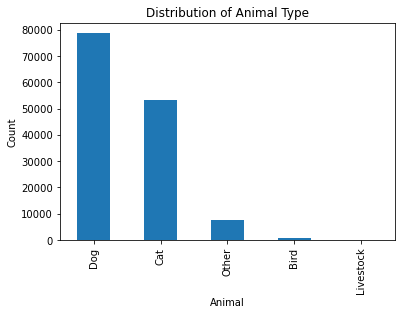

In [69]:
## Animal type.
plt.xlabel('Animal')
plt.ylabel('Count')
plt.title("Distribution of Animal Type")
aac_df['animal_type'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Distribution of Outcome Type'}, xlabel='Outcome', ylabel='Count'>

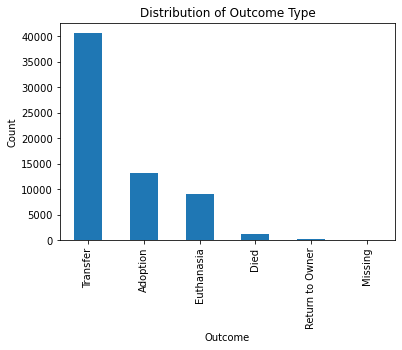

In [70]:
## Outcome type.
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title("Distribution of Outcome Type")
aac_clean_df['outcome_type'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Distribution of Sex at Time of Outcome'}, xlabel='Sex', ylabel='Count'>

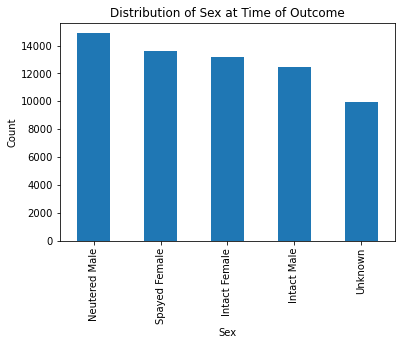

In [71]:
## Sex upon outcome type.
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title("Distribution of Sex at Time of Outcome")
aac_clean_df['sex_upon_outcome'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':"Distribution of an Animal's No. of Stays at the Clinic"}, xlabel='Previous Stays', ylabel='Count'>

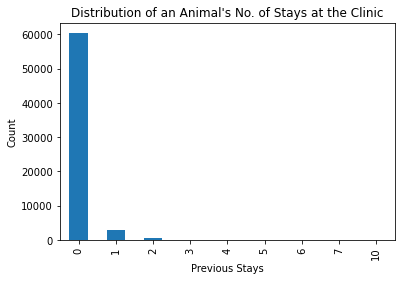

In [72]:
## Previous stays.
plt.xlabel('Previous Stays')
plt.ylabel('Count')
plt.title("Distribution of an Animal's No. of Stays at the Clinic")
aac_clean_df['n_previous_stays'].value_counts().plot(kind='bar')

Overall, the above distributions tell us:
* The dataset is mostly comprised of dogs.
* The most frequent outcome classification is transfer.
* Most of the animals at the time of their outcome post-shelter were neutered males.
* Most animals have not been previously taken into the shelter on a separate occasion.

I will not assess color or age at time of outcome using this method, as there are simply too many unique types for those variables. Later on in prior to my predictive analysis, I will assess these and may "group" these into smaller subgroups, or I may eliminate them if they are found to be unuseful. 

More individualized EDA will happen in the specific cat and dog steps/work that I will complete next as a part of this project.

### Cats and Dogs: Further Data Transformations

Given this dataset has so many breed and color types of animals, and given there are a few different types of animals within the dataset, I am going to separate each animal type into its own dataframe and build an individual model for each animal type grouping. More specifically, I am electing to focus on only cats and dogs for this project, given those two animals make up the bulk of AAC's data.

This will help to pare down the data a bit, and therefore the breed and color data that is specific to cats vs. dogs, and will likely produce a more accurate result for each type of animal regarding their post-shelter outcomes.

I will start with cats, and then do dogs second.

#### Cats:

##### Parse out the cats data to create a cats dataframe.

In [73]:
## Manipulate aac dataframe to parse out cat info.
cats_df = aac_clean_df[aac_clean_df['animal_type'] == 'Cat'].reset_index()
del cats_df['index']

In [74]:
## View length and dataframe.
print(len(cats_df))
cats_df.head()

32374


,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays
0,2013-10-01 10:39:00,2013-10-01 10:39:00,2013-09-24,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0
1,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0
2,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,Partner,0
3,2013-10-01 12:34:00,2013-10-01 12:34:00,2013-08-08,Died,Cat,Intact Male,1 month,Domestic Shorthair Mix,Blue/White,In Kennel,0
4,2013-10-01 12:57:00,2013-10-01 12:57:00,2013-09-24,Transfer,Cat,Intact Female,1 week,Domestic Shorthair Mix,Orange Tabby,Partner,0


In [75]:
## Save the data to .csv just in case for potential future retrieval purposes.
cats_df.to_csv("C:/Users/Madeleine's PC/Documents/Madeleine/Documents/Bellevue University Courses/Masters in DS/BU DSC630/Data/cats_working.csv", index=False, encoding='utf-8')

#### Feature Engineering:

Even though feature engineering can be tedious and time-consuming, it can yield significantly better results in the machine learning modeling phase of a project as the data is richer and more robust. 

For my data, each row represents one outcome. Therefore I will begin by adding a count column variable to denote the number of observations in each group.

In [76]:
## Feature engineering.
## Count.
cats_df['count'] = 1

For the feature engineering, I am going to make the dataset variables more useful for my work and analysis.

This will include handling the sex_upon_outcome variable. This denotes the cat's sex and if it was spayed or neutered upon the shelter outcome. This variable can be split into two new features, sex and spay/neuter.

Next, I will handle the cat's age variable and split that up into a more useful format. I will transform the column into a day value that can be converted into months and years (as needed). I will split the age_upon_outcome column using the .str.split method. 

With the period lengths, I will be able to approximate a cat's age upon outcome in days (multiplying the number of periods by the appropriate number of days). This can be done using the np.where() function. Once the age in days is obtained, I can then determine the age in years by dividing the days by 365.

In the shelter environment, kittens and cats have their own definitions. Kittens are defined as being approximately six months of age or less. They also tend to be adopted more quickly than cats, so having this information split out may be useful. Labeling whether a cat is an adult or a kitten could be a useful feature.

Next, I will want to convert the date columns into formats that are workable & usable with pandas and for future data analysis (pd.to_datetime() function). I will extract the month and year the cat was born and the time of outcome as a new variable.

In [77]:
## Sex variable.
cats_df['sex'] = np.where(cats_df['sex_upon_outcome'].str.contains('Male'), 'Male', 'Female')
cats_df['Spay/Neuter'] = np.where(cats_df['sex_upon_outcome'].str.contains('Intact'), 'No', 'Yes')

In [78]:
cats_df = cats_df[cats_df['age_upon_outcome'] != 'NULL']
cats_df['Periods'], cats_df['Period Range'] = cats_df['age_upon_outcome'].str.split(' ').str[0].fillna(0).astype(int), cats_df['age_upon_outcome'].str.split(' ').str[1].fillna(0)

cats_df['Period Range'].unique()

array(['week', 'month', 'weeks', 'year', 'months', 'years', 'day', 'days'],
      dtype=object)

In [79]:
cats_df['Period Range'] = np.where(cats_df['Period Range'].str.contains('day'), 1, 
                                   np.where(cats_df['Period Range'].str.contains('week'), 7, 
                                            np.where(cats_df['Period Range'].str.contains('month'), 30, 
                                                     np.where(cats_df['Period Range'].str.contains('year'), 365, 0)))).astype(int)

cats_df['outcome_age_(days)'] = cats_df['Period Range'] * cats_df['Periods']
cats_df['outcome_age_(years)'] = cats_df['outcome_age_(days)'] / 365

In [80]:
cats_df['Cat/Kitten (outcome)'] = np.where(cats_df['outcome_age_(days)'] >= 180, 'Cat', 'Kitten')
cats_df['sex_age_outcome'] = cats_df['sex_upon_outcome'] + ' ' + cats_df['Cat/Kitten (outcome)']

In [81]:
cats_df['age_group'] = pd.cut(cats_df['outcome_age_(years)'], 10)
cats_df['age_group'].value_counts()

(-0.022, 2.2]    28669
(2.2, 4.4]        1260
(4.4, 6.6]         776
(8.8, 11.0]        570
(6.6, 8.8]         563
(11.0, 13.2]       308
(13.2, 15.4]       159
(15.4, 17.6]        39
(17.6, 19.8]        20
(19.8, 22.0]        10
Name: age_group, dtype: int64

In [82]:
## Convert date columns into easy to use and work with formats.
## Pandas and pd.to_datetime().
## Month and year of birth is extracted and stored into a new column.

cats_df['date_of_birth'] = pd.to_datetime(cats_df['date_of_birth'])

cats_df['dob_year'] = cats_df['date_of_birth'].dt.year
cats_df['dob_month'] = cats_df['date_of_birth'].dt.month
cats_df['dob_monthyear'] = pd.to_datetime(cats_df['monthyear']).dt.to_period('M')

cats_df['datetime'] = pd.to_datetime(cats_df['datetime'])
cats_df['outcome_month'] = cats_df['datetime'].dt.month
cats_df['outcome_year'] = cats_df['datetime'].dt.year
## cats_df['outcome_weekday'] = cats_df['datetime'].dt.weekday_name
cats_df['outcome_hour'] = cats_df['datetime'].dt.hour

After creating those features, I will want to take into consideration the breed and coloring of cats.

In [83]:
## Dealing with the breeds.
cats_df['breed'].value_counts()

Domestic Shorthair Mix                      20277
Domestic Shorthair                           6670
Domestic Medium Hair Mix                     1959
Domestic Longhair Mix                         880
Siamese Mix                                   810
Domestic Medium Hair                          661
Domestic Longhair                             228
Siamese                                       160
American Shorthair Mix                        151
Snowshoe Mix                                  133
Maine Coon Mix                                 57
Manx Mix                                       56
Russian Blue Mix                               43
Ragdoll Mix                                    29
American Shorthair                             26
Himalayan Mix                                  17
Russian Blue                                   16
Balinese Mix                                   14
Snowshoe                                       11
Manx                                           10


Not as many cat breeds as dog breeds, but still quite a few!!

I will want to clean up these breed names a bit, to make them more useful in feature engineering and thus the model building.

In [84]:
## Clean up breed names by removing "Mix" - we will go with just the main breed name/prominent one.
cats_df['breed'] = cats_df['breed'].str.lower().str.replace('mix', '').str.replace('medium hair', 'mediumhair').str.strip()

In [85]:
## View the data.
cats_df.head()

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,...,outcome_age_(years),Cat/Kitten (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour
0,2013-10-01 10:39:00,2013-10-01 10:39:00,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,Orange/White,Partner,...,0.019178,Kitten,Unknown Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,10
1,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,Orange/White,Partner,...,0.019178,Kitten,Unknown Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,10
2,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,Orange/White,Partner,...,0.019178,Kitten,Unknown Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,10
3,2013-10-01 12:34:00,2013-10-01 12:34:00,2013-08-08,Died,Cat,Intact Male,1 month,domestic shorthair,Blue/White,In Kennel,...,0.082192,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2013,8,2013-10,10,2013,12
4,2013-10-01 12:57:00,2013-10-01 12:57:00,2013-09-24,Transfer,Cat,Intact Female,1 week,domestic shorthair,Orange Tabby,Partner,...,0.019178,Kitten,Intact Female Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,12


The Cat Fancier's Association (https://cfa.org/) currently recognizes 42 cat breeds. With this information, I am going to create two new features that distinguish the cat as a breed recognized by the CFA or a domestic breed. As is evident from above, we can see that most of the cats will be classified into the domestic category, but we will be able to analyze if a cats breed (or breed type) has any impact on its outcome.

I will create a list of all the CFA breeds and then convert the list to lowercase and join all the elements with a bar.

In [86]:
cfa_breeds = ['Abyssinian', 'American Bobtail', 'American Curl', 'American Shorthair', 'American Wirehair', 
              'Balinese', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Burmese', 'Burmilla', 
              'Chartreux', 'Colorpoint Shorthair', 'Cornish Rex', 'Devon Rex', 'Egyptian Mau', 'European Burmese', 
              'Exotic', 'Havana Brown', 'Japanese Bobtail', 'Korat', 'LaPerm', 'Maine Coon', 'Manx', 
              'Norwegian Forest Cat', 'Ocicat', 'Oriental', 'Persian', 'Ragamuffin', 'Ragdoll', 'Russian Blue', 
              'Scottish Fold', 'Selkirk Rex', 'Siamese', 'Siberian', 'Singapura', 'Somali', 'Tonkinese', 
              'Turkish Angora', 'Turkish Van']

cfa_breeds = [i.lower() for i in cfa_breeds]
cfa_breeds = '|'.join(cfa_breeds)

Some of the data records contain more than one breed (two breeds), which I will need to split for the categorization. 

I will use the .str.split() method with expand = True in combination with the pd.concat() function to join the resulting dataframe and my original dataset.

The cat record will then be categorized based on the resulting two breed columns (I will categorize the cat as a CFA recognized breed if one of the breed columns contains a breed that is present in the CFA list above). 

In [87]:
## Handle the breeds.
cats_df = pd.concat([cats_df, 
                     cats_df['breed'].str.split('/', expand=True).rename(columns={0:'breed1', 1:'breed2'})], 
                    axis=1)

cats_df['cfa_breed'] = np.where((cats_df['breed1'].str.contains(cfa_breeds)) | 
                                (cats_df['breed2'].str.contains(cfa_breeds)), 
                                True, False)

cats_df['domestic_breed'] = np.where((cats_df['breed1'].str.contains(cfa_breeds) == False) | 
                                     (cats_df['breed2'].str.contains(cfa_breeds) == False), 
                                     True, False)

In [88]:
## View data.
cats_df.head()

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,...,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed1,breed2,cfa_breed,domestic_breed
0,2013-10-01 10:39:00,2013-10-01 10:39:00,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,Orange/White,Partner,...,2013,9,2013-10,10,2013,10,domestic shorthair,None,False,True
1,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,Orange/White,Partner,...,2013,9,2013-10,10,2013,10,domestic shorthair,None,False,True
2,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,Orange/White,Partner,...,2013,9,2013-10,10,2013,10,domestic shorthair,None,False,True
3,2013-10-01 12:34:00,2013-10-01 12:34:00,2013-08-08,Died,Cat,Intact Male,1 month,domestic shorthair,Blue/White,In Kennel,...,2013,8,2013-10,10,2013,12,domestic shorthair,None,False,True
4,2013-10-01 12:57:00,2013-10-01 12:57:00,2013-09-24,Transfer,Cat,Intact Female,1 week,domestic shorthair,Orange Tabby,Partner,...,2013,9,2013-10,10,2013,12,domestic shorthair,None,False,True


Now to move on and take a similar approach with color. 

In [89]:
## Cat colors.
cats_df['color'].value_counts()

Brown Tabby                  5045
Black                        4333
Black/White                  2937
Brown Tabby/White            2477
Orange Tabby                 2446
Tortie                       1527
Calico                       1360
Blue Tabby                   1312
Blue                         1248
Orange Tabby/White           1072
Torbie                        934
Blue/White                    796
Cream Tabby                   598
White/Black                   544
Blue Tabby/White              521
Lynx Point                    433
White                         341
White/Brown Tabby             320
Seal Point                    298
Gray Tabby                    266
Cream Tabby/White             232
White/Blue                    209
Torbie/White                  197
Black Tabby                   186
Flame Point                   180
Gray Tabby/White              112
Gray                          112
White/Orange Tabby            108
Black Smoke                   105
Orange        

From the above list, I can see that quite a few cat colors also exist!

In addition to colors, we can see that coat patterns are at play here, too. It may be helpful to break apart cat colors and cat coat patterns for this feature engineering. 

Thankfully, there aren't too many coat patterns to deal with, and I can list them out just as I did with the breeds. The University of Florida's Shelter Medicine website (https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiCm5Wg1oX4AhX0RTABHRU-Bf4QFnoECBoQAQ&url=https%3A%2F%2Fsheltermedicine.vetmed.ufl.edu%2Ffiles%2F2011%2F11%2Fidentification-and-coat-colors-patterns.pdf&usg=AOvVaw3IbArUXoPuDqnFgkrhkp3V) is a great resource for finding cat coat information.

In [90]:
## Coat patterns.
coat_patterns = ['tabby', 'tortie', 'tortoiseshell', 'calico', 'smoke', 'torbie',
                 'colorpoint', 'point', 'brindle', 'agouti', 'bicolor', 'tricolor']

I will want to extract the given coat pattern and color information, one way of which is using a regex string in conjunction with pandas' str.extract.

In [91]:
## Create the regex string by joining the coat patterns with | and encapsulating them in parantheses
coat_reg = '(' + '|'.join(coat_patterns) + ')'

I will convert the color column to lowercase.
Then, if a coat pattern is given that matches one of the values within the list, it will be extracted into a new column called coat pattern. I will also remove the coat pattern from the color column, so that I do not have any duplicate values.

In [92]:
## Set the color and coat_pattern variables.
cats_df['color'] = cats_df['color'].str.lower()

cats_df['coat_pattern'] = cats_df['color'].str.extract(coat_reg, expand=False)

cats_df['color'] = cats_df['color'].str.replace(coat_reg, '').str.strip()

C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_5860/3178028745.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cats_df['color'] = cats_df['color'].str.replace(coat_reg, '').str.strip()


My new/updated color column is split into a two column dataframe using the .str.split() method with the parameter expand set to True. Doing this and using this methodology may result in empty values in the first color column (color1) due to the removal of certain original information from the original column. The blank values will be present only when a breed is a specific color, such as tabby, torbie, or tortoiseshell.

Given this, I will search for any rows in the color1 column that are blank and change them to 'Breed Specific'. The extracted coat colors and patterns are then combined into a new column, coat.

In [93]:
## Concatenate the colors.
cats_df = pd.concat([cats_df, 
                     cats_df['color'].str.split('/', expand=True).rename(columns={0:'color1', 1:'color2'})], axis=1)

In [94]:
## Color 1.
cats_df['color1'] = np.where(cats_df['color1'] == '', 'Breed Specific', cats_df['color1'])

In [95]:
## Coat.
cats_df['coat'] = np.where(cats_df['color1'] == 'Breed Specific', cats_df['coat_pattern'], cats_df['color1'])

In [96]:
## View data.
pd.set_option('display.max_columns', None)
cats_df.head(5)

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Cat/Kitten (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2013-10-01 10:39:00,2013-10-01 10:39:00,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,orange/white,Partner,0,1,Female,Yes,1,7,7,0.019178,Kitten,Unknown Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,10,domestic shorthair,None,False,True,NaN,orange,white,orange
1,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,orange/white,Partner,0,1,Female,Yes,1,7,7,0.019178,Kitten,Unknown Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,10,domestic shorthair,None,False,True,NaN,orange,white,orange
2,2013-10-01 10:44:00,2013-10-01 10:44:00,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,orange/white,Partner,0,1,Female,Yes,1,7,7,0.019178,Kitten,Unknown Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,10,domestic shorthair,None,False,True,NaN,orange,white,orange
3,2013-10-01 12:34:00,2013-10-01 12:34:00,2013-08-08,Died,Cat,Intact Male,1 month,domestic shorthair,blue/white,In Kennel,0,1,Male,No,1,30,30,0.082192,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2013,8,2013-10,10,2013,12,domestic shorthair,None,False,True,NaN,blue,white,blue
4,2013-10-01 12:57:00,2013-10-01 12:57:00,2013-09-24,Transfer,Cat,Intact Female,1 week,domestic shorthair,orange,Partner,0,1,Female,No,1,7,7,0.019178,Kitten,Intact Female Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,12,domestic shorthair,None,False,True,tabby,orange,None,orange


Some final cleanup can be done as far as eliminating any features that I won't need for the model building. Now that I have engineered some features that I want and that will be beneficial for use, I can take a last sweep and remove those that won't be necessary.

I already removed animal_id and name, since those variables have too many unique entries, so likely won't be useful (and I previously got what I needed from them feature engineering-wise).

Next, since I have engineered more useful date and time variables from the original ones, I can eliminate those. 

In [97]:
## Remove/drop datetime and monthyear.
## Now that I have engineered my new features, I will no longer need these features. 

cats_df = cats_df.drop(['datetime', 'monthyear'], axis=1)

In [54]:
## Convert object variables to categorical variables.

##for col in ['outcome_type', 'animal_type', 'sex_upon_outcome', 'age_upon_outcome', 'color']:
    ##aac_clean_df[col] = aac_clean_df[col].astype('category')

In [55]:
## Recheck data types.
##aac_clean_df.dtypes

Now that I have completed the feature engineering step, I will move forward with the Cats EDA.

#### Cat EDA & Preliminary Analysis:

Earlier, I looked at and explored the original dataset a bit. Now, the below section will also be an EDA, but will focus on the cat portion of the data.

In [98]:
## View the data again.
cats_df.head(5)

,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Cat/Kitten (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,orange/white,Partner,0,1,Female,Yes,1,7,7,0.019178,Kitten,Unknown Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,10,domestic shorthair,None,False,True,NaN,orange,white,orange
1,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,orange/white,Partner,0,1,Female,Yes,1,7,7,0.019178,Kitten,Unknown Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,10,domestic shorthair,None,False,True,NaN,orange,white,orange
2,2013-09-24,Transfer,Cat,Unknown,1 week,domestic shorthair,orange/white,Partner,0,1,Female,Yes,1,7,7,0.019178,Kitten,Unknown Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,10,domestic shorthair,None,False,True,NaN,orange,white,orange
3,2013-08-08,Died,Cat,Intact Male,1 month,domestic shorthair,blue/white,In Kennel,0,1,Male,No,1,30,30,0.082192,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2013,8,2013-10,10,2013,12,domestic shorthair,None,False,True,NaN,blue,white,blue
4,2013-09-24,Transfer,Cat,Intact Female,1 week,domestic shorthair,orange,Partner,0,1,Female,No,1,7,7,0.019178,Kitten,Intact Female Kitten,"(-0.022, 2.2]",2013,9,2013-10,10,2013,12,domestic shorthair,None,False,True,tabby,orange,None,orange


In [99]:
## Import additional necessary packages for visualizations.

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [100]:
## Set seaborn.
sns.set(font_scale=1.5, palette=sns.color_palette("Set1", n_colors=15, desat=.5)) #sns.xkcd_palette(sns.xkcd_rgb))
sns.set_style('ticks')

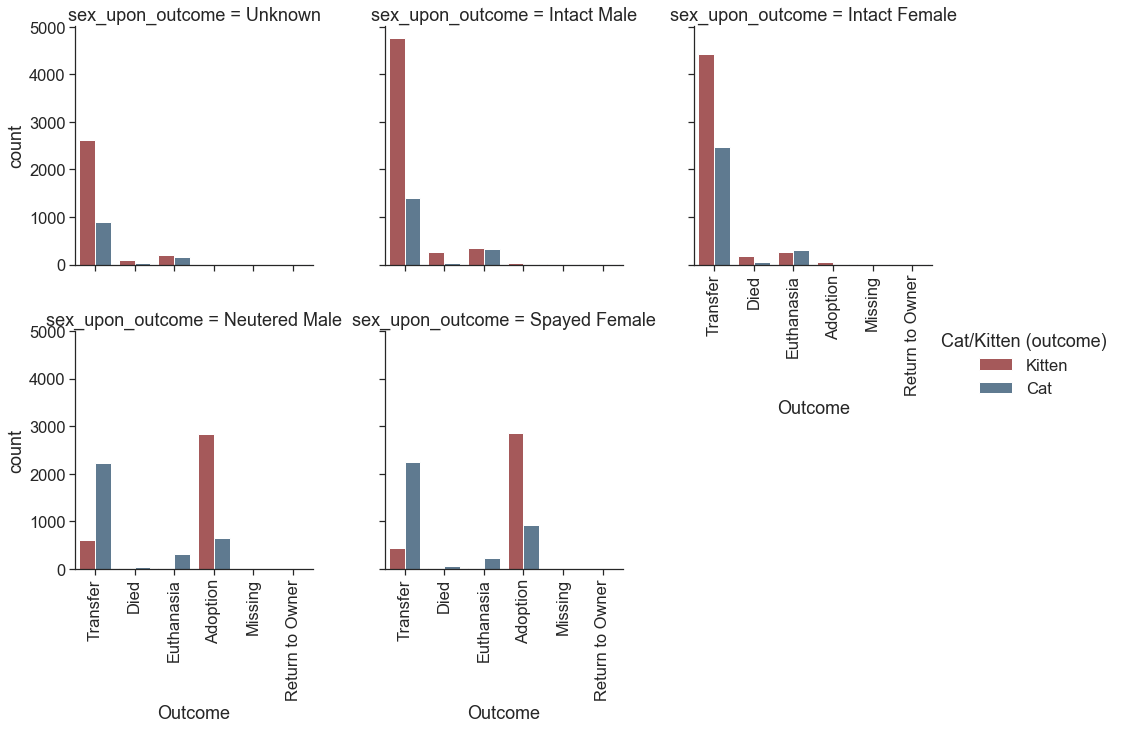

In [101]:
## Use factorplot to plot several categorical variables at once.
g = sns.factorplot(x='outcome_type', hue='Cat/Kitten (outcome)', col='sex_upon_outcome', 
               col_wrap=3, data=cats_df, kind='count', size=4.5)

g.set_xticklabels(rotation=90)
g.set_xlabels('Outcome')

From the above, we can ascertain the following:

* Intact male and female cats are most often transferred.
    * The majority of these are kittens, which would make sense as kittens would be less likely to be spayed or neutered due to their age. 
* Neutered and spayed cats and kittens usually end up being adopted.
    * Kittens = adopted more frequently.

Knowing that a significant portion of outcomes are transfers to other facilities, it would be good to also explore outcome subtypes for those. I will look at this in relation to sex and age of the cat.

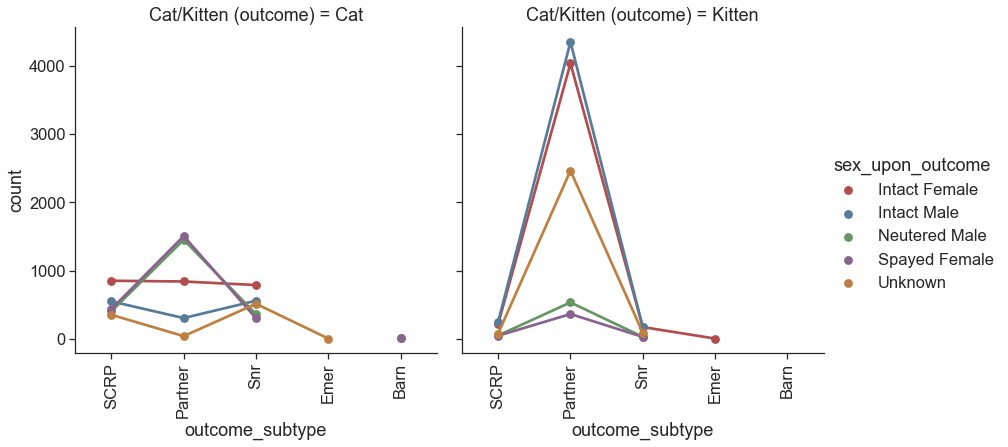

In [102]:
## Take a look at subtypes.
transfer_subtype_counts = cats_df[cats_df['outcome_type'] == 'Transfer']
transfer_subtype_counts = transfer_subtype_counts.groupby(['sex_upon_outcome', 'Cat/Kitten (outcome)'])['outcome_subtype'].value_counts().reset_index(name='count')

g = sns.factorplot(x='outcome_subtype', y='count', hue='sex_upon_outcome', col='Cat/Kitten (outcome)', 
               data=transfer_subtype_counts, size=6)

g.set_xticklabels(rotation=90)

From the above, we can ascertain the following:
* Most kittens are transferred to partner facilities.
* There are more cats of adult age with the stray capture program outcome (SCRP).


* NOTE: The SCRP is Austin's Stray Cat Return Program, a progressive trap, neuter, and release program.

I will also look at this data a bit further to assess the following:
* Does the age in years of a cat have a significant impact on their outcome? 
* Also, are there any outcome subtypes that appear more frequently than others?

I will use swarmplot as well as sample() - this will grab 200 random samples of all of the data (since I don't need to plot all of the rows in their entirety).

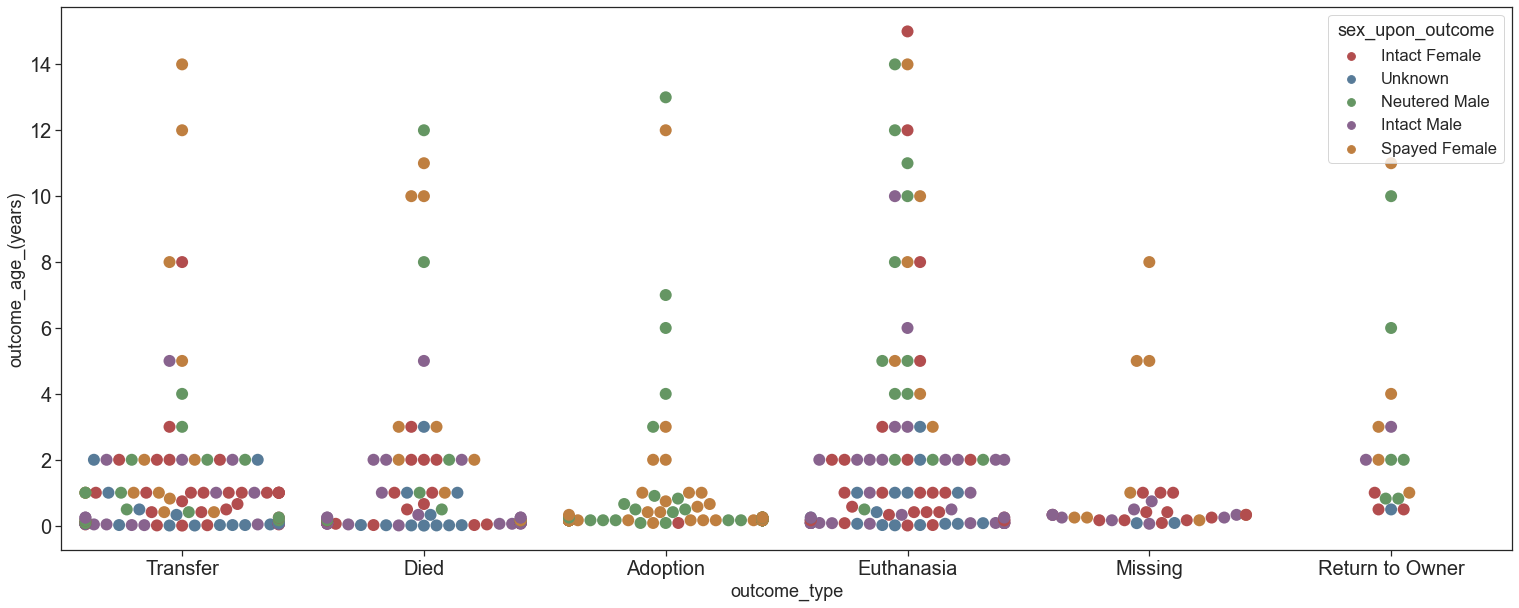

In [103]:
## Sampled data.

cat_outcomes_sample = cats_df.sample(frac=1.0).groupby(['outcome_type']).head(100)

plt.figure(figsize=(26,10))
g = sns.swarmplot(x='outcome_type', y='outcome_age_(years)', hue='sex_upon_outcome', 
                  data=cat_outcomes_sample, size=12)

g.tick_params(labelsize=20)

From the above, we can ascertain:
* Neutered males and spayed females appear to largely comprise the bulk of the returned to owner outcome.
* It also appears that the majority of cats coming through the shelter are below five years of age. 
* Cats subjected to euthanasia or passed away in the shelter look to be mostly intact males and females (with some unknowns), primarily in the younger age range.

Next, I would like to explore outcome types across time (would be interesting for comparison purposes).

In [105]:
monthyear_outcomes = pd.pivot_table(cats_df, index=['dob_monthyear'], 
                                    columns=['outcome_type'], values='count', aggfunc=np.sum)
## monthyear_outcomes.index = pd.to_datetime(monthyear_outcomes.index)

## monthyear_outcomes.plot(fontsize=14, linewidth=5, title='Outcomes over Time', figsize=(26,10))

<AxesSubplot:title={'center':'Non-Adoption/Transfer Outcomes over Time'}, xlabel='dob_monthyear'>

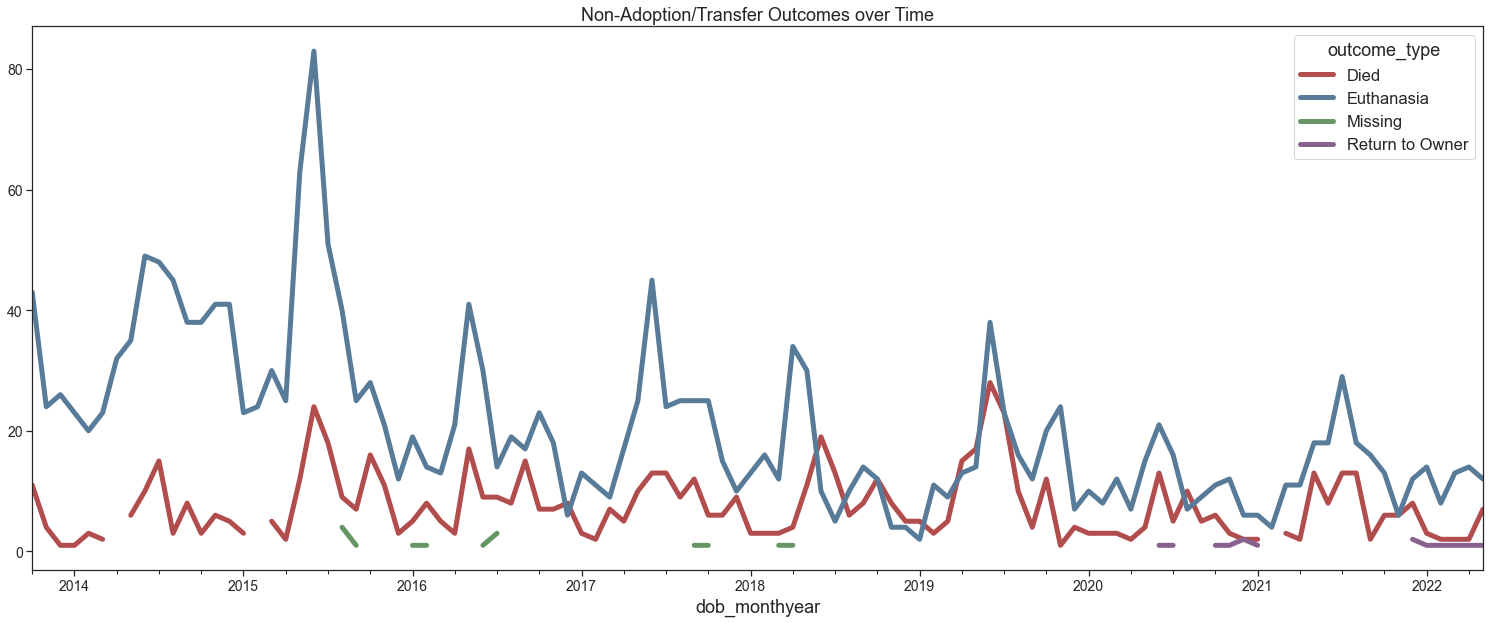

In [106]:
monthyear_outcomes2 = monthyear_outcomes.filter(items=['Died', 'Disposal', 'Euthanasia', 'Missing', 
                                                      'Return to Owner', 'Rto-Adopt'])

monthyear_outcomes2.plot(fontsize=14, linewidth=5, figsize=(26,10), 
                         title='Non-Adoption/Transfer Outcomes over Time')

From the above, we can ascertain:
* Not really any return to owners to notice until mid-2020.
* Deaths occurring in the shelter also look to spike or trend upwards in the middle of the year.
    * This trend of deaths rising in the summer and middle of the year is also somewhat aligned with euthanasia outcomes.
* A large euthanasia spike takes place mid-2015.

Next, it might be interesting to assess any significant trends or groupings of outcomes based on the age group of the cat and if that changes depending on sex. 

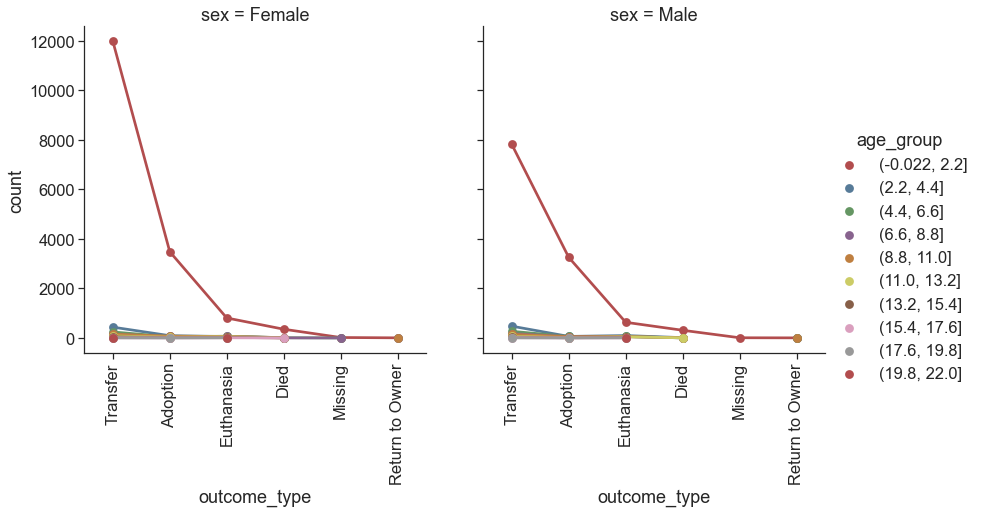

In [107]:
## Looking at outcome type by sex and age.
agegroup_counts = cats_df.groupby(['age_group', 'sex'])['outcome_type'].value_counts().reset_index(name='count')

g = sns.factorplot(x='outcome_type', y='count', hue='age_group', col='sex',
                   data=agegroup_counts, size=6)

g.set_xticklabels(rotation=90)

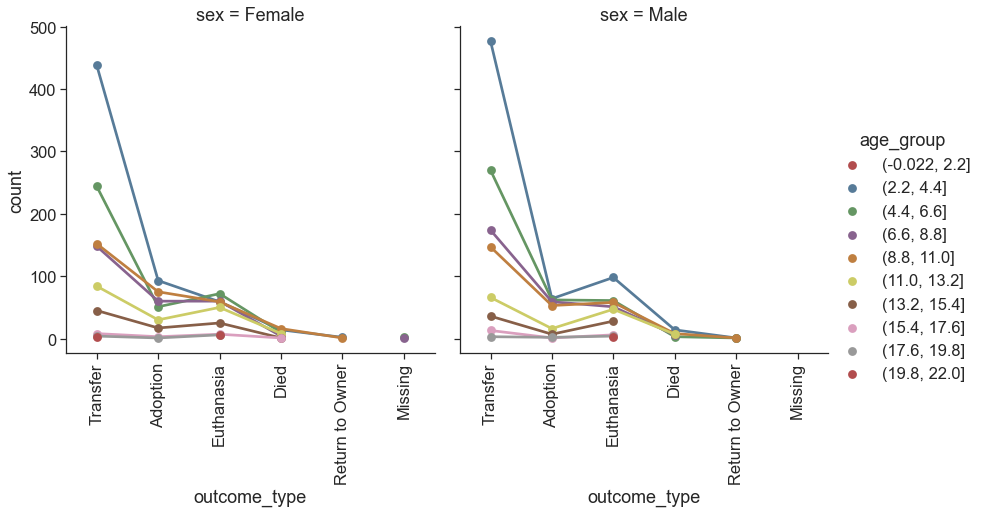

In [108]:
## Looking at outcome type by sex and age.
agegroup_counts2 = agegroup_counts[agegroup_counts['age_group'] != agegroup_counts['age_group'].unique()[0]]

g = sns.factorplot(x='outcome_type', y='count', hue='age_group', col='sex', 
                   data=agegroup_counts2, size=6)

g.set_xticklabels(rotation=90)

From the first graph above, we can ascertain the following:
* Cats under two years old make up the majority of records.
* There are comparatively fewer male cats as well, whom also seem to be less likely to be transferred to a partner facility.

Since the number of cats under approximately two years of age skewed the graph a bit, I decided to filter for that and run the EDA again - which is the second graph. From that one:

* Cats under approximately five years of age make up the majority of cat records (which was also noted in a previous EDA graph).
* The most common outcomes are adoption or transfer to a partner facility. 
* There is no apparent significant deviation in outcomes as the age of the cat increases. 
    * Thus, the actual age of the cat likely does not factor into the probability of a particular outcome as much as if the cat is of kitten age or not.

#### Cats EDA: Conclusions and Summary

Overall, the key findings from the cat-specific EDA lead us to the following:

* Intact males and females of kitten age (six months or less) are transferred more than any other outcome.
    * The result is consistent with general shelter practice as intact cats are generally spayed or neutered before becoming available for adoption.
    * Kittens are more likely to be transferred to partner facilities, perhaps for receiving treatments (spayed/neutered, vaccines, etc.).
* Neutered/spayed kittens are adopted more frequently than adults.
    * Kittens are typically adopted faster (less time in the shelter) than adult cats.
* The cats entering the shelter are usually under five years of age.
* Adoptions and transfers are very seasonal, peaking in the summer months (mid-year) and then dropping back down until the subsequent summer season.
    * Other outcomes such as return to owner, are less seasonal and not as easy to track/glean meaning from across time.
* There does not appear to be any significant relation in the outcome to the age group of the cat, other than if the cat is of kitten age or not.

#### Cats: Model Preparation & Building

In [118]:
## Import necessary libraries for machine learning. 
## May already have some of these imported above. 

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline, FeatureUnion

import joblib

import warnings
warnings.simplefilter('ignore')

First, I will define a confusion matrix function to call upon later after the model building.

In [119]:
## Define a confusion matrix function - inspired by the confusion matrix info at:
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
## Clean and prep data.
## Index.
## Using two main subtypes to group all outcome types into two classifications.
## THIS STEP IS HANDLED LATER ON. 
## Ghost Code.
## cats_df = cats_df.loc[(cats_df['outcome_type'] == 'Adoption') | 
                                ## (cats_df['outcome_type'] == 'Transfer')]

I want to view that data again as a refresher.

In [74]:
## View data again.
cats_df.head(5)

,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Cat/Kitten (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2022-04-24,Transfer,Cat,Intact Male,4 weeks,domestic shorthair,orange,Partner,1,Male,No,4,7,28,0.076712,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2022,4,2022-05,5,2022,11,domestic shorthair,None,False,True,tabby,orange,None,orange
1,2022-04-24,Transfer,Cat,Intact Female,4 weeks,domestic shorthair,orange,Partner,1,Female,No,4,7,28,0.076712,Kitten,Intact Female Kitten,"(-0.022, 2.2]",2022,4,2022-05,5,2022,11,domestic shorthair,None,False,True,tabby,orange,None,orange
2,2022-04-24,Transfer,Cat,Intact Male,4 weeks,domestic shorthair,orange,Partner,1,Male,No,4,7,28,0.076712,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2022,4,2022-05,5,2022,11,domestic shorthair,None,False,True,tabby,orange,None,orange
3,2022-04-24,Transfer,Cat,Intact Male,4 weeks,domestic shorthair,black,Partner,1,Male,No,4,7,28,0.076712,Kitten,Intact Male Kitten,"(-0.022, 2.2]",2022,4,2022-05,5,2022,11,domestic shorthair,None,False,True,NaN,black,None,black
4,2008-05-25,Euthanasia,Cat,Spayed Female,14 years,domestic longhair,brown,Rabies Risk,1,Female,Yes,14,365,5110,14.000000,Cat,Spayed Female Cat,"(13.2, 15.4]",2008,5,2022-05,5,2022,9,domestic longhair,None,False,True,tabby,brown,None,brown


Next, a refresher on outcome types and subtypes.

In [109]:
## Outcome types.
cats_df['outcome_type'].value_counts()

Transfer           22103
Adoption            7326
Euthanasia          2140
Died                 757
Missing               31
Return to Owner       17
Name: outcome_type, dtype: int64

In [110]:
## Subtype.
cats_df['outcome_subtype'] = np.where(pd.isnull(cats_df['outcome_subtype']), 
                                           cats_df['outcome_type'], 
                                           cats_df['outcome_subtype'])

In [111]:
## Subtypes.
cats_df['outcome_subtype'].value_counts()

Partner           15893
Foster             7209
SCRP               3211
Snr                2989
Suffering          1832
In Kennel           414
In Foster           265
At Vet              170
Offsite             114
Rabies Risk         102
Medical              87
Enroute              34
In Surgery           14
Barn                 11
Field                 7
Customer S            6
Aggressive            4
Prc                   4
Emergency             3
Possible Theft        2
Emer                  2
Underage              1
Name: outcome_subtype, dtype: int64

Now I will define the features for training and testing my model.

In [112]:
## Features.
x = cats_df.filter(items=['sex_upon_outcome', 'breed', 'color', 'coat_pattern', 'n_previous_stays',
                               'domestic_breed', 'dob_month', 'age_group', 'outcome_month', 
                               'outcome_weekday', 'outcome_hour', 'Cat/Kitten (outcome)'])

Next I will define the target variable, which is outcome type.

In [113]:
## Convert to categorical.
## This will be helpful for transforming categorical variables into numeric for model use.
for col in x:
    x[col] = x[col].astype('category')
    
## y = cats_df['outcome_subtype'].astype('category')
y = cats_df['outcome_type'].astype('category')

The next steps will be continued prep for getting the data ready to feed into the machine learning model.

##### Obtain dummy variables and split the data (train/test).

In [114]:
## Obtain dummy variables.
xd = pd.get_dummies(x)

In [115]:
## Obtain column names for plotting purposes later.
xnames = xd.columns
xarr = np.array(xd)

In [116]:
## yarr, ynames = pd.factorize(cats_df['outcome_subtype'])
yarr, ynames = pd.factorize(cats_df['outcome_type'])

In [120]:
## Split the data.
x_train, x_test, y_train, y_test = train_test_split(xarr, yarr, 
                                                    test_size=0.3, random_state=1)

In [121]:
## Add a scaler to the train and test sets.

scaler = preprocessing.StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##### Important feature identification.

Now, since I have split the data, I am going to move forward and find important features using random forests. 

In [122]:
## Initiate the classifier.

rf_classifier = RandomForestClassifier(n_estimators=250, criterion='gini', 
                                       class_weight='balanced_subsample', bootstrap=True, oob_score=True)

rf_classifier.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=250,
                       oob_score=True)

<AxesSubplot:xlabel='feature', ylabel='importance'>

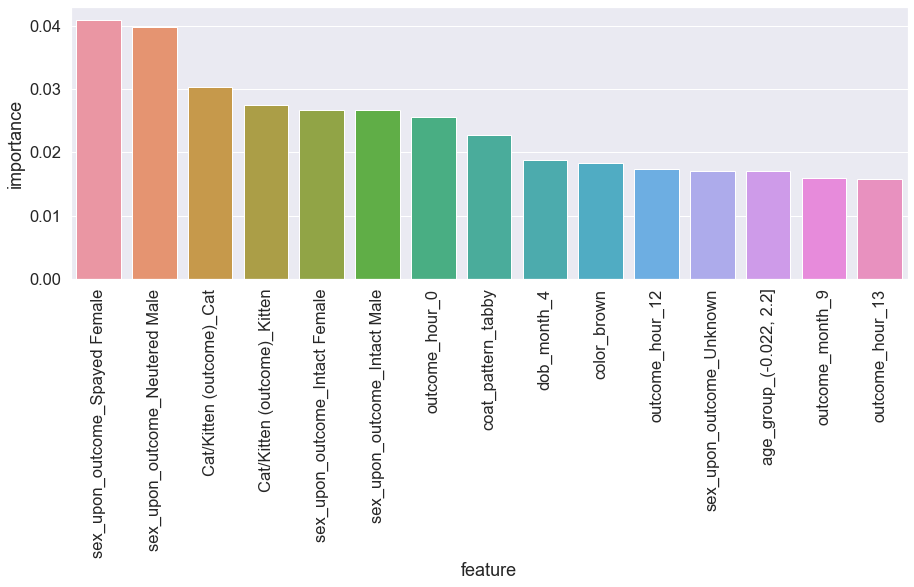

In [123]:
## Extract features and plot them based upon importance. 
feature_importances = rf_classifier.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15])

The above random forest classifier reports that the most important features when predicting a shelter cat adoption, or partner transfer are (in this order):

* Spayed females.
* Neutered males.
* If it is a cat.
* If it is a kitten.
* Intact female.
* Intact male.
* The outcome hour being 0 (midnight) (interesting).
* Having a tabby coat pattern.
* Being born in April (interesting).
* Being brown in color.
* Unknown sex (interesting).
* Being approximately 2 years of age or under.
* Outcome month being September (interesting).
* Outcome hour being 13 (1PM) (interesting).


    
    
Some additional notes and thoughts include:

* Being a female cat seems to be more important than being a male in terms of outcome prediction.
* Whether cat or kitten, this aids in the prediction process.
* Tabby coat patterns and brown colording seem to be important features when predicting an adoption or transfer outcome. It is interesting how only the tabby coat pattern appears but not any others.

#### Dimension Reduction with PCA

To further improve upon the features to be used in model building, I will conduct dimension reduction using PCA techniques.

In [124]:
## Initiate PCA.
pca = PCA()

## Fit the PCA to the scaled data.
pca.fit(x_train_scaled)

PCA()

In [125]:
## Features.
print(len(pca.components_))

318


<AxesSubplot:xlabel='components'>

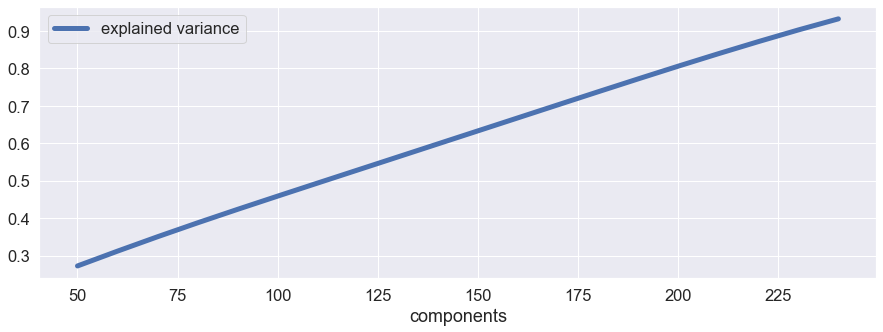

In [126]:
## Plot variance of the components.
comps = np.arange(50, 250, 10)
exp_var = []

for comp in comps:
    exp_var.append(sum(pca.explained_variance_ratio_[0:comp]))
    
pca_exp_var = pd.concat([pd.Series(comps, name='components'), 
                         pd.Series(exp_var, name='explained variance')], axis=1)

pca_exp_var.set_index('components', inplace=True)

pca_exp_var.plot(kind='line', linewidth=5, figsize=(15, 5))

#### Machine Learning Model Building & Predictive Analytics:

For the first model run, I will run the model for all of the possible outcome types. 

In [127]:
## Feature union and model prediction (with pipeline).

feature_union = FeatureUnion([
    ('pca', PCA()),
    ('kbest', SelectKBest())
])

prediction_model = Pipeline([
    ('feature_union', feature_union),
    ('rf', RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                  class_weight='balanced_subsample', bootstrap=True, 
                                  oob_score=True))
])



In [128]:
## Fit the prediction model.
prediction_model.fit(x_train_scaled, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('pca', PCA()),
                                                ('kbest', SelectKBest())])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        n_estimators=1000, oob_score=True))])

In [129]:
## Cross-validation fold.
cv = StratifiedKFold(2)

In [130]:
## CV score and prediction.
cv_score = cross_val_score(prediction_model, x_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_predict_score = cross_val_predict(prediction_model, x_train_scaled, y_train, cv=cv)

In [131]:
## Print out results of scores.
print(cv_score)
print(np.mean(cv_score))

print(accuracy_score(y_train, cv_predict_score))

[0.80831348 0.80953222]
0.8089228458307015
0.8089228189400292


In [132]:
rf_pred = prediction_model.predict(x_test_scaled)

In [133]:
print(accuracy_score(y_test, rf_pred))

0.8045917842067333


The model accuracy comes in at about 80%, which is not as high as I would like, but not bad. 

Normalized confusion matrix
Confusion matrix, without normalization


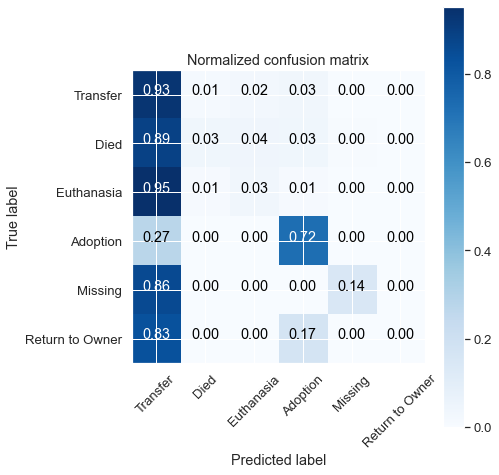

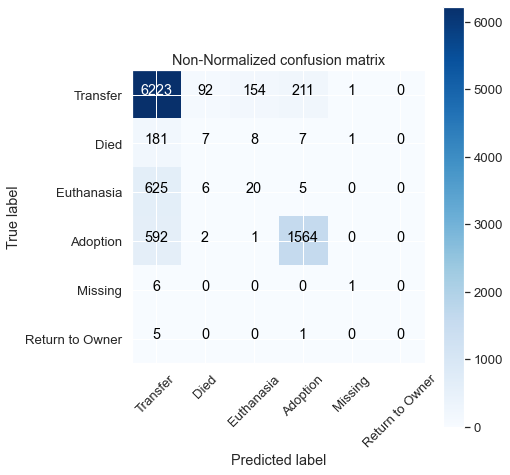

In [134]:
sns.set(font_scale=1.2)

rf_cnf_mat = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(rf_cnf_mat, classes=ynames, normalize=True, title='Normalized confusion matrix')

plt.figure(figsize=(7, 7))
plot_confusion_matrix(rf_cnf_mat, classes=ynames, normalize=False, title='Non-Normalized confusion matrix')

plt.show()

In [135]:
print(classification_report(y_test, rf_pred, target_names=ynames))

                 precision    recall  f1-score   support

       Transfer       0.82      0.93      0.87      6681
           Died       0.07      0.03      0.05       204
     Euthanasia       0.11      0.03      0.05       656
       Adoption       0.87      0.72      0.79      2159
        Missing       0.33      0.14      0.20         7
Return to Owner       0.00      0.00      0.00         6

       accuracy                           0.80      9713
      macro avg       0.37      0.31      0.33      9713
   weighted avg       0.76      0.80      0.78      9713



Next, in an attempt to improve the model a bit, I am going to only run the model with two main potential outcomes - adoption and transfer.

In [136]:
## Clean and prep data.
## Index.
## Using two main types to group all outcome types into two classifications.
cats_df = cats_df.loc[(cats_df['outcome_type'] == 'Adoption') | 
                                (cats_df['outcome_type'] == 'Transfer')]

In [137]:
## Features.
x = cats_df.filter(items=['sex_upon_outcome', 'breed', 'color', 'coat_pattern', 
                               'domestic_breed', 'dob_month', 'age_group', 'outcome_month', 'n_previous_stays',
                               'outcome_weekday', 'outcome_hour', 'Cat/Kitten (outcome)'])


In [138]:
## Convert to categorical.

## This will be helpful for transforming categorical variables into numeric for model use.
for col in x:
    x[col] = x[col].astype('category')

## y = cats_df['outcome_subtype'].astype('category')
y = cats_df['outcome_type'].astype('category')

In [139]:
## Obtain dummy variables.
xd = pd.get_dummies(x)

In [140]:
## Obtain column names for plotting purposes later.
xnames = xd.columns
xarr = np.array(xd)

## yarr, ynames = pd.factorize(cats_df['outcome_subtype'])
yarr, ynames = pd.factorize(cats_df['outcome_type'])

In [141]:
## Split the data.
x_train, x_test, y_train, y_test = train_test_split(xarr, yarr, 
                                                    test_size=0.3, random_state=1)

In [142]:
## Add a scaler to the train and test sets.
scaler = preprocessing.StandardScaler()


x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [143]:
## Find important features using random forests.
## Initiate the classifier.
rf_classifier = RandomForestClassifier(n_estimators=250, criterion='gini', 
                                       class_weight='balanced_subsample', bootstrap=True, oob_score=True)

In [144]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=250,
                       oob_score=True)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=250,
                       oob_score=True)

In [145]:
## Initiate PCA.
pca = PCA()

## Fit the PCA to the scaled data.
pca.fit(x_train_scaled)

PCA()

In [146]:
print(len(pca.components_))

295


<AxesSubplot:xlabel='components'>

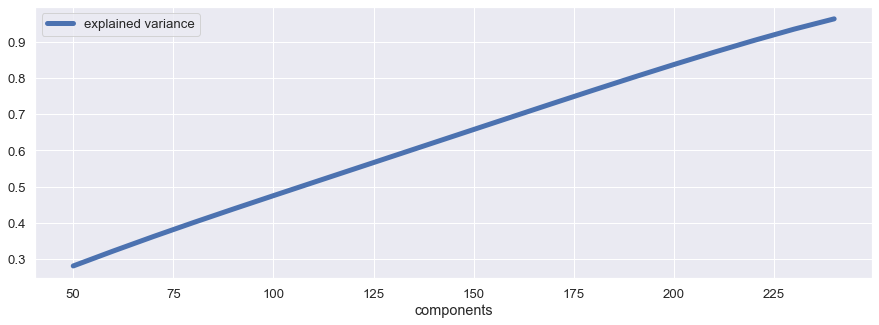

In [147]:
comps = np.arange(50, 250, 10)
exp_var = []

for comp in comps:
    exp_var.append(sum(pca.explained_variance_ratio_[0:comp]))
    
pca_exp_var = pd.concat([pd.Series(comps, name='components'), 
                         pd.Series(exp_var, name='explained variance')], axis=1)

pca_exp_var.set_index('components', inplace=True)

pca_exp_var.plot(kind='line', linewidth=5, figsize=(15, 5))

In [148]:
## Feature union and model prediction.

feature_union = FeatureUnion([
    ('pca', PCA()),
    ('kbest', SelectKBest())
])

prediction_model = Pipeline([
    ('feature_union', feature_union),
    ('rf', RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                  class_weight='balanced_subsample', bootstrap=True, 
                                  oob_score=True))
])



In [149]:
prediction_model.fit(x_train_scaled, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('pca', PCA()),
                                                ('kbest', SelectKBest())])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        n_estimators=1000, oob_score=True))])

In [150]:
## Cross-validation fold.
cv = StratifiedKFold(2)

In [151]:
## CV score and prediction.
cv_score = cross_val_score(prediction_model, x_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_predict_score = cross_val_predict(prediction_model, x_train_scaled, y_train, cv=cv)

In [115]:
## Print out results of scores.
print(cv_score)
print(np.mean(cv_score))

print(accuracy_score(y_train, cv_predict_score))

[0.90941782 0.9085431 ]
0.9089804645738166
0.9090290601613373


In [152]:
rf_pred = prediction_model.predict(x_test_scaled)

In [153]:
print(accuracy_score(y_test, rf_pred))

0.9084834069543549


The model accuracy now comes in at about 90%, which is quite the increase from the previous one!

Normalized confusion matrix
Confusion matrix, without normalization


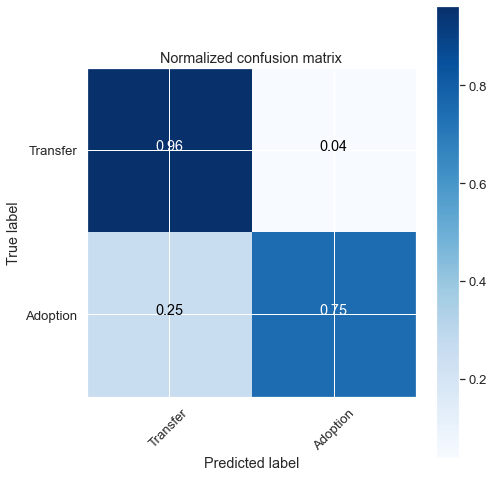

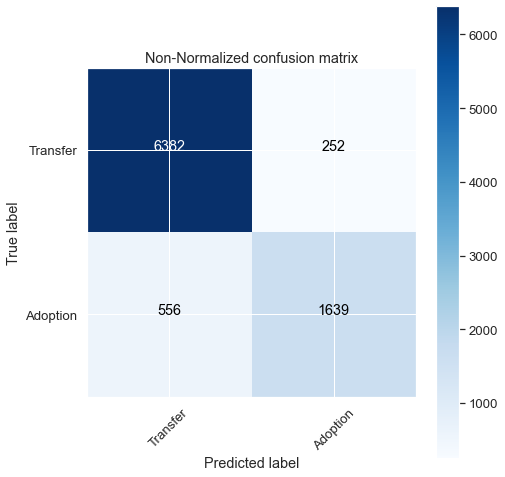

In [154]:
## Confusion matrices.
sns.set(font_scale=1.2)

rf_cnf_mat = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(rf_cnf_mat, classes=ynames, normalize=True, title='Normalized confusion matrix')

plt.figure(figsize=(7, 7))
plot_confusion_matrix(rf_cnf_mat, classes=ynames, normalize=False, title='Non-Normalized confusion matrix')

plt.show()

In [155]:
## Classification report.
print(classification_report(y_test, rf_pred, target_names=ynames))

              precision    recall  f1-score   support

    Transfer       0.92      0.96      0.94      6634
    Adoption       0.87      0.75      0.80      2195

    accuracy                           0.91      8829
   macro avg       0.89      0.85      0.87      8829
weighted avg       0.91      0.91      0.91      8829



From the confusion matrices, we can ascertain the following:

* The model had the most success in predicting if the cat is to be transferred to a partner facility, which would make sense as these had the most samples to draw from by far and represent the bulk of the class outcomes.

### Dogs

Now that I have completed the cats portion, I am going to move on to complete the dogs portion. 

For this section, I will proceed with the same steps (for the most part/essentially) that I did above with the cats; of course, each animal type (dog vs. cat) may have specific information for feature engineering respective to that animal type. 

In [264]:
## Manipulate aac dataframe to parse out dog info.
dogs_df = aac_clean_df[aac_clean_df['animal_type'] == 'Dog'].reset_index()
del dogs_df['index']

In [265]:
## View length and dataframe.
print(len(dogs_df))
dogs_df.head()

25307


,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays
0,2013-10-01 09:31:00,2013-10-01 09:31:00,2013-07-23,Adoption,Dog,Neutered Male,2 months,Labrador Retriever Mix,Black,Foster,0
1,2013-10-01 11:12:00,2013-10-01 11:12:00,2010-09-22,Transfer,Dog,Neutered Male,3 years,Toy Poodle Mix,White,Partner,0
2,2013-10-01 11:13:00,2013-10-01 11:13:00,2011-09-25,Transfer,Dog,Spayed Female,2 years,Boxer Mix,Red/White,Partner,0
3,2013-10-01 12:05:00,2013-10-01 12:05:00,2012-09-17,Euthanasia,Dog,Neutered Male,1 year,Chesa Bay Retr Mix,Red/White,Behavior,0
4,2013-10-01 12:24:00,2013-10-01 12:24:00,2011-09-20,Euthanasia,Dog,Neutered Male,2 years,American Bulldog Mix,White/Brown Brindle,Aggressive,0


In [266]:
## Save file for easy access if needed later on.
dogs_df.to_csv("C:/Users/Madeleine's PC/Documents/Madeleine/Documents/Bellevue University Courses/Masters in DS/BU DSC630/Data/cats_working.csv", index=False, encoding='utf-8')

#### Feature Engineering

In [267]:
## Feature engineering.
## Count.
dogs_df['count'] = 1

In [268]:
## Sex variable.
dogs_df['sex'] = np.where(dogs_df['sex_upon_outcome'].str.contains('Male'), 'Male', 'Female')
dogs_df['Spay/Neuter'] = np.where(dogs_df['sex_upon_outcome'].str.contains('Intact'), 'No', 'Yes')

In [269]:
dogs_df = dogs_df[dogs_df['age_upon_outcome'] != 'NULL']
dogs_df['Periods'], dogs_df['Period Range'] = dogs_df['age_upon_outcome'].str.split(' ').str[0].fillna(0).astype(int), dogs_df['age_upon_outcome'].str.split(' ').str[1].fillna(0)

dogs_df['Period Range'].unique()

array(['months', 'years', 'year', 'month', 'weeks', 'week', 'days', 'day'],
      dtype=object)

In [270]:
dogs_df['Period Range'] = np.where(dogs_df['Period Range'].str.contains('day'), 1, 
                                   np.where(dogs_df['Period Range'].str.contains('week'), 7, 
                                            np.where(dogs_df['Period Range'].str.contains('month'), 30, 
                                                     np.where(dogs_df['Period Range'].str.contains('year'), 365, 0)))).astype(int)

dogs_df['outcome_age_(days)'] = dogs_df['Period Range'] * dogs_df['Periods']
dogs_df['outcome_age_(years)'] = dogs_df['outcome_age_(days)'] / 365

In [271]:
## Dog and puppy: https://www.thesprucepets.com/stages-of-puppy-development-2804675 (After 6 months, is considered an adolescent).
dogs_df['Dog/Puppy (outcome)'] = np.where(dogs_df['outcome_age_(days)'] >= 180, 'Dog', 'Puppy')
dogs_df['sex_age_outcome'] = dogs_df['sex_upon_outcome'] + ' ' + dogs_df['Dog/Puppy (outcome)']

In [272]:
dogs_df['age_group'] = pd.cut(dogs_df['outcome_age_(years)'], 10)
dogs_df['age_group'].value_counts()

(-0.023, 2.3]    17653
(2.3, 4.6]        2871
(4.6, 6.9]        1668
(6.9, 9.2]        1624
(9.2, 11.5]        807
(11.5, 13.8]       442
(13.8, 16.1]       216
(16.1, 18.4]        20
(18.4, 20.7]         5
(20.7, 23.0]         1
Name: age_group, dtype: int64

In [273]:
## Convert date columns into easy to use and work with formats.
## Pandas and pd.to_datetime().
## Month and year of birth is extracted and stored into a new column.

dogs_df['date_of_birth'] = pd.to_datetime(dogs_df['date_of_birth'])

dogs_df['dob_year'] = dogs_df['date_of_birth'].dt.year
dogs_df['dob_month'] = dogs_df['date_of_birth'].dt.month
dogs_df['dob_monthyear'] = pd.to_datetime(dogs_df['monthyear']).dt.to_period('M')

dogs_df['datetime'] = pd.to_datetime(dogs_df['datetime'])
dogs_df['outcome_month'] = dogs_df['datetime'].dt.month
dogs_df['outcome_year'] = dogs_df['datetime'].dt.year
## dogs_df['outcome_weekday'] = dogs_df['datetime'].dt.weekday_name
dogs_df['outcome_hour'] = dogs_df['datetime'].dt.hour

In [274]:
## Dealing with the breeds.

dogs_df['breed'].value_counts()

Pit Bull Mix                                              2824
Labrador Retriever Mix                                    2500
Chihuahua Shorthair Mix                                   2340
German Shepherd Mix                                        996
Pit Bull                                                   622
Chihuahua Shorthair                                        548
Australian Cattle Dog Mix                                  548
Labrador Retriever                                         420
Dachshund Mix                                              356
Boxer Mix                                                  351
Border Collie Mix                                          306
German Shepherd                                            276
Miniature Poodle Mix                                       271
Australian Shepherd Mix                                    269
Great Pyrenees Mix                                         241
Catahoula Mix                                          

In [275]:
## Clean up breed names by removing "Mix" - we will go with just the main breed name/prominent one.
dogs_df['breed'] = dogs_df['breed'].str.lower().str.replace('mix', '').str.replace('medium hair', 'mediumhair').str.strip()

In [276]:
dogs_df.head()

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Dog/Puppy (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour
0,2013-10-01 09:31:00,2013-10-01 09:31:00,2013-07-23,Adoption,Dog,Neutered Male,2 months,labrador retriever,Black,Foster,0,1,Male,Yes,2,30,60,0.164384,Puppy,Neutered Male Puppy,"(-0.023, 2.3]",2013,7,2013-10,10,2013,9
1,2013-10-01 11:12:00,2013-10-01 11:12:00,2010-09-22,Transfer,Dog,Neutered Male,3 years,toy poodle,White,Partner,0,1,Male,Yes,3,365,1095,3.000000,Dog,Neutered Male Dog,"(2.3, 4.6]",2010,9,2013-10,10,2013,11
2,2013-10-01 11:13:00,2013-10-01 11:13:00,2011-09-25,Transfer,Dog,Spayed Female,2 years,boxer,Red/White,Partner,0,1,Female,Yes,2,365,730,2.000000,Dog,Spayed Female Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,11
3,2013-10-01 12:05:00,2013-10-01 12:05:00,2012-09-17,Euthanasia,Dog,Neutered Male,1 year,chesa bay retr,Red/White,Behavior,0,1,Male,Yes,1,365,365,1.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2012,9,2013-10,10,2013,12
4,2013-10-01 12:24:00,2013-10-01 12:24:00,2011-09-20,Euthanasia,Dog,Neutered Male,2 years,american bulldog,White/Brown Brindle,Aggressive,0,1,Male,Yes,2,365,730,2.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,12


There are many more recognizable dog breeds than cat breeds (which makes sense, given the breeding history of dogs vs. cats).

For this section, the American Kennel Club is the resource I used to identify the specific dog breeds. 

https://www.akc.org/

In [277]:
akc_breeds = ['Border Terrier', 
'Pit Bull', 
'Border Collie', 
'Podengo Pequeno', 
'Chihuahua Shorthair',
'Anatol Shepherd',
'Weimaraner',
'Labrador Retriever',
'Great Pyrenees',  
'Cairn Terrier', 
'Dachshund', 
'German Shepherd', 
'Black', 
'Siberian Husky', 
'Miniature Poodle', 
'Yorkshire Terrier', 
'Norfolk Terrier', 
'Australian Cattle Dog', 
'Australian Shepherd', 
'Belgian Malinois', 
'Jack Russell Terrier', 
'Doberman Pinsch', 
'Japanese Chin', 
'Staffordshire', 
'Welsh Terrier', 
'Shetland Sheepdog', 
'Vizsla', 
'Rottweiler', 
'American Staffordshire Terrier', 
'American Bulldog', 
'Chinese Sharpei', 
'Great Dane', 
'Harrier', 
'Flat Coat Retriever', 
'Dachshund Wirehair', 
'Leonberger', 
'Dachshund Longhair', 
'Chesa Bay Retriever', 
'Mastiff',
'Chihuahua Longhair', 
'Rat Terrier', 
'Greyhound', 
'Boxer', 
'Bulldog', 
'Miniature Pinscher', 
'Carolina Dog', 
'Toy Poodle', 
'Pointer', 
'Queensland Heeler', 
'American Pit Bull Terrier', 
'Miniature Schnauzer', 
'Beagle', 
'Kuvasz', 
'Shih Tzu', 
'Pekingese', 
'Catahoula', 
'Maltese', 
'Australian Kelpie', 
'Basset Hound', 
'Treeing Walker Coonhound', 
'Bull Terrier', 
'American Foxhound', 
'Chow Chow', 
'Italian Greyhound', 
'Boston Terrier', 
'Blue Lacy', 
'Golden Retriever', 
'Collie Rough', 
'Plott Hound', 
'Redbone Hound', 
'Cocker Spaniel', 
'English Springer Spaniel', 
'Black Mouth Cur', 
'Basenji', 
'Pug', 
'Parson Russell Terrier', 
'English Pointer', 
'Skye Terrier', 
'Airedale Terrier', 
'Cardigan Welsh Corgi', 
'Finnish Spitz', 
'English Setter', 
'Alaskan Husky', 
'Rhod Ridgeback', 
'Newfoundland', 
'Brittany', 
'Collie Smooth', 
'Port Water Dog', 
'Bull Terrier Miniature', 
'Lhasa Apso', 
'Norwich Terrier', 
'Whippet', 
'Old English Sheepdog', 
'Shiba Inu', 
'Bullmastiff', 
'Ibizan Hound', 
'Scottish Terrier', 
'English Foxhound', 
'Silky Terrier', 
'Keeshond', 
'English Bulldog', 
'Pomeranian', 
'Havanese', 
'Cane Corso', 
'Soft Coated Wheaten Terrier', 
'Schipperke', 
'Pharaoh Hound', 
'American Eskimo', 
'Pembroke Welsh Corgi', 
'Eng Toy Spaniel', 
'Wire Hair Fox Terrier', 
'Standard Schnauzer', 
'West Highland', 
'Bruss Griffon', 
'Pbgv', 
'Entlebucher', 
'German Shorthair Pointer', 
'Picardy Sheepdog', 
'Beauceron', 
'Standard Poodle', 
'Bearded Collie', 
'Papillon', 
'Bichon Frise', 
'Cavalier Span', 
'French Bulldog', 
'St. Bernard Rough Coat', 
'Alaskan Malamute', 
'Irish Terrier', 
'Bloodhound', 
'Akita', 
'Landseer', 
'Swedish Vallhund', 
'Bluetick Hound', 
'Jindo', 
'Afghan Hound', 
'Canaan Dog', 
'German Pinscher', 
'Affenpinscher', 
'Manchester Terrier', 
'Dogue De Bordeaux', 
'Tibetan Terrier', 
'Boerboel', 
'Irish Wolfhound', 
'Coton De Tulear', 
'Dogo Argentino', 
'German Wirehaired Pointer', 
'Dutch Shepherd', 
'Belgian Sheepdog', 
'Bernese Mountain Dog', 
'Dalmatian', 
'Feist', 
'Old English Bulldog', 
'Toy Fox Terrier', 
'Smooth Fox Terrier', 
'St. Bernard Smooth Coat', 
'Welsh Springer Spaniel', 
'Boykin Span', 
'Nova Scotia Duck Tolling Retriever', 
'Chinese Crested', 
'Spinone Italiano', 
'Samoyed', 
'English Coonhound', 
'Presa Canario', 
'Wirehaired Pointing Griffon', 
'Australian Terrier', 
'Greater Swiss Mountain Dog', 
'Gordon Setter', 
'Glen Of Imaal', 
'Otterhound', 
'Saluki', 
'Tibetan Spaniel', 
'Belgian Tervuren', 
'Field Spaniel', 
'Patterdale Terr', 
'Treeing Cur', 
'Dandie Dinmont', 
'Schnauzer Giant', 
'English Cocker Spaniel', 
'Irish Setter', 
'Swiss Hound', 
'English Shepherd', 
'Sealyham Terr', 
'Bedlington Terr', 
'Unknown', 
'Lowchen', 
'Spanish Mastiff', 
'Dachshund Stan', 
'Mexican Hairless', 
'Neapolitan Mastiff', 
'Treeing Tennesse Brindle', 
'Norwegian Elkhound', 
'Akbash', 
'Hovawart', 
'Sussex Span', 
'Lakeland Terrier', 
'Grand Basset Griffon Vendeen', 
'Bouv Flandres', 
'Clumber Spaniel', 
'Tibetan Mastiff', 
'Briard', 
'Spanish Water Dog', 
'Alaskan Klee Kai', 
'Kangal', 
'Dutch Sheepdog', 
'Wolf Hybrid', 
'Wirehaired Vizsla', 
'Chihuahua Shorthair']

In [278]:
akc_breeds = [i.lower() for i in akc_breeds]
akc_breeds = '|'.join(akc_breeds)

In [279]:
dogs_df = pd.concat([dogs_df, 
                     dogs_df['breed'].str.split('/', expand=True).rename(columns={0:'breed_1', 1:'breed_2'})], 
                    axis=1)


In [280]:
dogs_df.head()

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Dog/Puppy (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed_1,breed_2,2
0,2013-10-01 09:31:00,2013-10-01 09:31:00,2013-07-23,Adoption,Dog,Neutered Male,2 months,labrador retriever,Black,Foster,0,1,Male,Yes,2,30,60,0.164384,Puppy,Neutered Male Puppy,"(-0.023, 2.3]",2013,7,2013-10,10,2013,9,labrador retriever,None,None
1,2013-10-01 11:12:00,2013-10-01 11:12:00,2010-09-22,Transfer,Dog,Neutered Male,3 years,toy poodle,White,Partner,0,1,Male,Yes,3,365,1095,3.000000,Dog,Neutered Male Dog,"(2.3, 4.6]",2010,9,2013-10,10,2013,11,toy poodle,None,None
2,2013-10-01 11:13:00,2013-10-01 11:13:00,2011-09-25,Transfer,Dog,Spayed Female,2 years,boxer,Red/White,Partner,0,1,Female,Yes,2,365,730,2.000000,Dog,Spayed Female Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,11,boxer,None,None
3,2013-10-01 12:05:00,2013-10-01 12:05:00,2012-09-17,Euthanasia,Dog,Neutered Male,1 year,chesa bay retr,Red/White,Behavior,0,1,Male,Yes,1,365,365,1.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2012,9,2013-10,10,2013,12,chesa bay retr,None,None
4,2013-10-01 12:24:00,2013-10-01 12:24:00,2011-09-20,Euthanasia,Dog,Neutered Male,2 years,american bulldog,White/Brown Brindle,Aggressive,0,1,Male,Yes,2,365,730,2.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,12,american bulldog,None,None


In [281]:
dogs_df['akc_breed'] = np.where((dogs_df['breed_1'].str.contains(akc_breeds)) | 
                                (dogs_df['breed_2'].str.contains(akc_breeds)), 
                                True, False)

In [282]:
dogs_df.head()

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Dog/Puppy (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed_1,breed_2,2,akc_breed
0,2013-10-01 09:31:00,2013-10-01 09:31:00,2013-07-23,Adoption,Dog,Neutered Male,2 months,labrador retriever,Black,Foster,0,1,Male,Yes,2,30,60,0.164384,Puppy,Neutered Male Puppy,"(-0.023, 2.3]",2013,7,2013-10,10,2013,9,labrador retriever,None,None,True
1,2013-10-01 11:12:00,2013-10-01 11:12:00,2010-09-22,Transfer,Dog,Neutered Male,3 years,toy poodle,White,Partner,0,1,Male,Yes,3,365,1095,3.000000,Dog,Neutered Male Dog,"(2.3, 4.6]",2010,9,2013-10,10,2013,11,toy poodle,None,None,True
2,2013-10-01 11:13:00,2013-10-01 11:13:00,2011-09-25,Transfer,Dog,Spayed Female,2 years,boxer,Red/White,Partner,0,1,Female,Yes,2,365,730,2.000000,Dog,Spayed Female Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,11,boxer,None,None,True
3,2013-10-01 12:05:00,2013-10-01 12:05:00,2012-09-17,Euthanasia,Dog,Neutered Male,1 year,chesa bay retr,Red/White,Behavior,0,1,Male,Yes,1,365,365,1.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2012,9,2013-10,10,2013,12,chesa bay retr,None,None,False
4,2013-10-01 12:24:00,2013-10-01 12:24:00,2011-09-20,Euthanasia,Dog,Neutered Male,2 years,american bulldog,White/Brown Brindle,Aggressive,0,1,Male,Yes,2,365,730,2.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,12,american bulldog,None,None,True


In [283]:
dogs_df['domestic_breed'] = np.where((dogs_df['breed_1'].str.contains(akc_breeds) == False) | 
                                     (dogs_df['breed_2'].str.contains(akc_breeds) == False), 
                                     True, False)

In [284]:
dogs_df.head()

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Dog/Puppy (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed_1,breed_2,2,akc_breed,domestic_breed
0,2013-10-01 09:31:00,2013-10-01 09:31:00,2013-07-23,Adoption,Dog,Neutered Male,2 months,labrador retriever,Black,Foster,0,1,Male,Yes,2,30,60,0.164384,Puppy,Neutered Male Puppy,"(-0.023, 2.3]",2013,7,2013-10,10,2013,9,labrador retriever,None,None,True,False
1,2013-10-01 11:12:00,2013-10-01 11:12:00,2010-09-22,Transfer,Dog,Neutered Male,3 years,toy poodle,White,Partner,0,1,Male,Yes,3,365,1095,3.000000,Dog,Neutered Male Dog,"(2.3, 4.6]",2010,9,2013-10,10,2013,11,toy poodle,None,None,True,False
2,2013-10-01 11:13:00,2013-10-01 11:13:00,2011-09-25,Transfer,Dog,Spayed Female,2 years,boxer,Red/White,Partner,0,1,Female,Yes,2,365,730,2.000000,Dog,Spayed Female Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,11,boxer,None,None,True,False
3,2013-10-01 12:05:00,2013-10-01 12:05:00,2012-09-17,Euthanasia,Dog,Neutered Male,1 year,chesa bay retr,Red/White,Behavior,0,1,Male,Yes,1,365,365,1.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2012,9,2013-10,10,2013,12,chesa bay retr,None,None,False,True
4,2013-10-01 12:24:00,2013-10-01 12:24:00,2011-09-20,Euthanasia,Dog,Neutered Male,2 years,american bulldog,White/Brown Brindle,Aggressive,0,1,Male,Yes,2,365,730,2.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,12,american bulldog,None,None,True,False


In [177]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25307 entries, 0 to 25306
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             25307 non-null  datetime64[ns]
 1   monthyear            25307 non-null  datetime64[ns]
 2   date_of_birth        25307 non-null  datetime64[ns]
 3   outcome_type         25307 non-null  object        
 4   animal_type          25307 non-null  object        
 5   sex_upon_outcome     25307 non-null  object        
 6   age_upon_outcome     25307 non-null  object        
 7   breed                25307 non-null  object        
 8   color                25307 non-null  object        
 9   outcome_subtype      25307 non-null  object        
 10  n_previous_stays     25307 non-null  int64         
 11  count                25307 non-null  int64         
 12  sex                  25307 non-null  object        
 13  Spay/Neuter          25307 non-

In [285]:
## Dog colors.

dogs_df['color'].value_counts()

Black/White                    2938
Black                          1458
White                          1447
Brown/White                    1442
Tan/White                      1308
Tan                            1230
Brown                          1137
Tricolor                       1002
White/Black                     935
Black/Tan                       898
White/Brown                     875
Black/Brown                     835
Brown/Black                     694
Brown Brindle/White             693
White/Tan                       681
Blue/White                      642
Red                             463
Brown Brindle                   405
Red/White                       395
Tan/Black                       390
Chocolate/White                 312
Cream                           279
Sable                           230
Yellow                          212
Chocolate                       188
Buff                            183
White/Brown Brindle             161
Fawn/White                  

In [286]:
## Pull any potential coat patterns from the dog fur/coat colors.
coat_patterns = ['brindle', 'spotted', 'merle', 'tricolor', 'tick', 'tiger', 'tortie']

In [287]:
# Create the regex string by joining the coat patterns with | and encapsulating them in parantheses
coat_reg = '(' + '|'.join(coat_patterns) + ')'

In [288]:
dogs_df['color'] = dogs_df['color'].str.lower()

dogs_df['coat_pattern'] = dogs_df['color'].str.extract(coat_reg, expand=False)

dogs_df['color'] = dogs_df['color'].str.replace(coat_reg, '').str.strip()

In [289]:
dogs_df = pd.concat([dogs_df, 
                     dogs_df['color'].str.split('/', expand=True).rename(columns={0:'color_1', 1:'color_2'})], axis=1)

In [290]:
dogs_df['color_1'] = np.where(dogs_df['color_1'] == '', 'Breed Specific', dogs_df['color_1'])

In [291]:
dogs_df['coat'] = np.where(dogs_df['color_1'] == 'Breed Specific', dogs_df['coat_pattern'], dogs_df['color_1'])

In [292]:
pd.set_option('display.max_columns', None)
dogs_df.head(5)

,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Dog/Puppy (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed_1,breed_2,2,akc_breed,domestic_breed,coat_pattern,color_1,color_2,coat
0,2013-10-01 09:31:00,2013-10-01 09:31:00,2013-07-23,Adoption,Dog,Neutered Male,2 months,labrador retriever,black,Foster,0,1,Male,Yes,2,30,60,0.164384,Puppy,Neutered Male Puppy,"(-0.023, 2.3]",2013,7,2013-10,10,2013,9,labrador retriever,None,None,True,False,NaN,black,None,black
1,2013-10-01 11:12:00,2013-10-01 11:12:00,2010-09-22,Transfer,Dog,Neutered Male,3 years,toy poodle,white,Partner,0,1,Male,Yes,3,365,1095,3.000000,Dog,Neutered Male Dog,"(2.3, 4.6]",2010,9,2013-10,10,2013,11,toy poodle,None,None,True,False,NaN,white,None,white
2,2013-10-01 11:13:00,2013-10-01 11:13:00,2011-09-25,Transfer,Dog,Spayed Female,2 years,boxer,red/white,Partner,0,1,Female,Yes,2,365,730,2.000000,Dog,Spayed Female Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,11,boxer,None,None,True,False,NaN,red,white,red
3,2013-10-01 12:05:00,2013-10-01 12:05:00,2012-09-17,Euthanasia,Dog,Neutered Male,1 year,chesa bay retr,red/white,Behavior,0,1,Male,Yes,1,365,365,1.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2012,9,2013-10,10,2013,12,chesa bay retr,None,None,False,True,NaN,red,white,red
4,2013-10-01 12:24:00,2013-10-01 12:24:00,2011-09-20,Euthanasia,Dog,Neutered Male,2 years,american bulldog,white/brown,Aggressive,0,1,Male,Yes,2,365,730,2.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,12,american bulldog,None,None,True,False,brindle,white,brown,white


In [293]:
## Remove/drop datetime and monthyear.
## Now that I have engineered my new features, I will no longer need these features. 

dogs_df = dogs_df.drop(['datetime', 'monthyear'], axis=1)

#### Dog EDA & Preliminary Analysis:

Earlier, I looked at and explored the original dataset a bit. Now, the below section will also be an EDA, but will focus on the dog portion of the data.

In [188]:
## View the data again.
dogs_df.head(5)

,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Dog/Puppy (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed_1,breed_2,2,akc_breed,domestic_breed,coat_pattern,color1,color2,color_1,color_2,coat
0,2013-07-23,Adoption,Dog,Neutered Male,2 months,labrador retriever,black,Foster,0,1,Male,Yes,2,30,60,0.164384,Puppy,Neutered Male Puppy,"(-0.023, 2.3]",2013,7,2013-10,10,2013,9,labrador retriever,None,None,True,False,NaN,black,None,black,None,black
1,2010-09-22,Transfer,Dog,Neutered Male,3 years,toy poodle,white,Partner,0,1,Male,Yes,3,365,1095,3.000000,Dog,Neutered Male Dog,"(2.3, 4.6]",2010,9,2013-10,10,2013,11,toy poodle,None,None,True,False,NaN,white,None,white,None,white
2,2011-09-25,Transfer,Dog,Spayed Female,2 years,boxer,red/white,Partner,0,1,Female,Yes,2,365,730,2.000000,Dog,Spayed Female Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,11,boxer,None,None,True,False,NaN,red,white,red,white,red
3,2012-09-17,Euthanasia,Dog,Neutered Male,1 year,chesa bay retr,red/white,Behavior,0,1,Male,Yes,1,365,365,1.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2012,9,2013-10,10,2013,12,chesa bay retr,None,None,False,True,NaN,red,white,red,white,red
4,2011-09-20,Euthanasia,Dog,Neutered Male,2 years,american bulldog,white/brown,Aggressive,0,1,Male,Yes,2,365,730,2.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,12,american bulldog,None,None,True,False,brindle,white,brown,white,brown,white


In [189]:
## Import additional necessary packages for visualizations.

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [190]:
## Set seaborn.
sns.set(font_scale=1.5, palette=sns.color_palette("Set1", n_colors=15, desat=.5)) #sns.xkcd_palette(sns.xkcd_rgb))
sns.set_style('ticks')

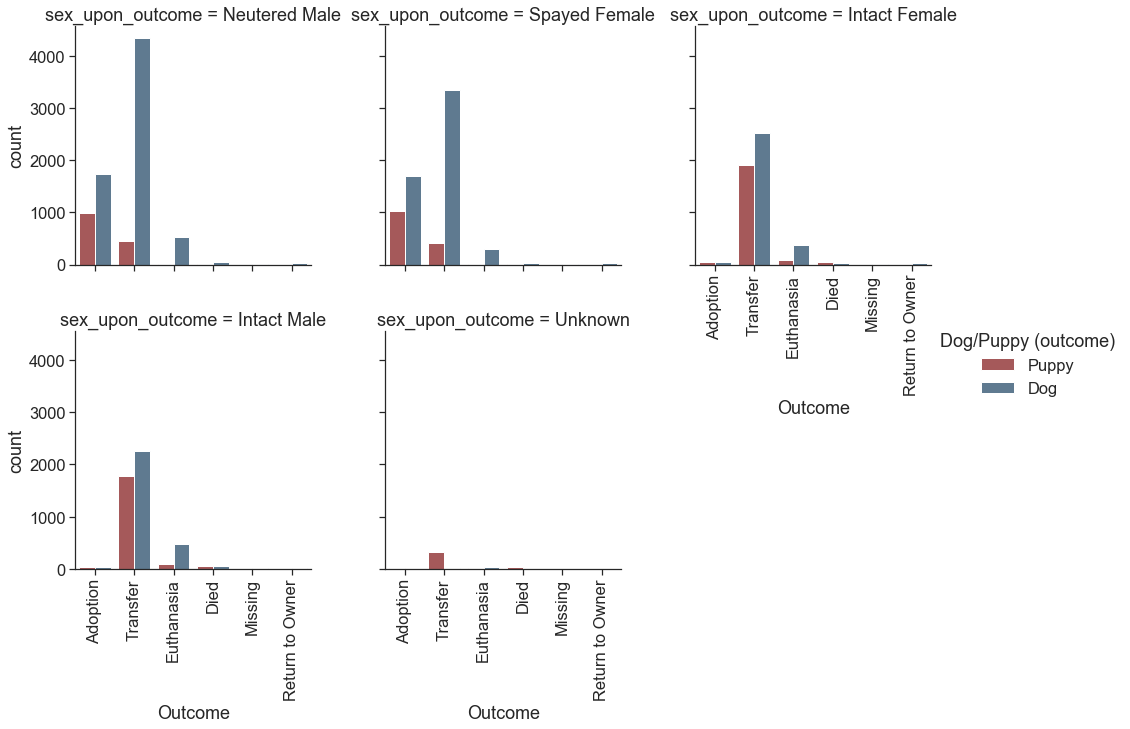

In [194]:
## Use factorplot to plot several categorical variables at once.
g = sns.factorplot(x='outcome_type', hue='Dog/Puppy (outcome)', col='sex_upon_outcome', 
               col_wrap=3, data=dogs_df, kind='count', size=4.5)

g.set_xticklabels(rotation=90)
g.set_xlabels('Outcome')

From the above, we can ascertain the following:

* Neutered and spayed dogs are most often transferred.
* Dogs are adopted more frequently than puppies.

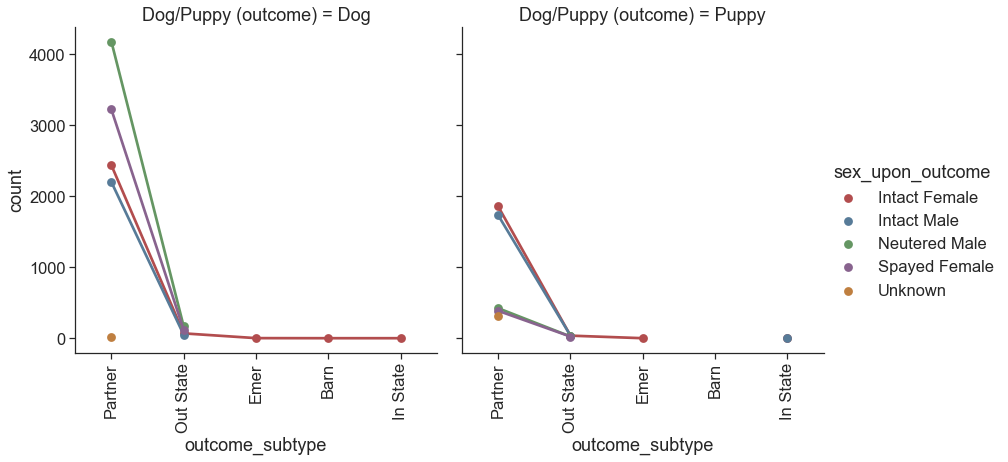

In [195]:
## Take a look at subtypes.
transfer_subtype_counts = dogs_df[dogs_df['outcome_type'] == 'Transfer']
transfer_subtype_counts = transfer_subtype_counts.groupby(['sex_upon_outcome', 'Dog/Puppy (outcome)'])['outcome_subtype'].value_counts().reset_index(name='count')

g = sns.factorplot(x='outcome_subtype', y='count', hue='sex_upon_outcome', col='Dog/Puppy (outcome)', 
               data=transfer_subtype_counts, size=6)

g.set_xticklabels(rotation=90)

From the above, we can ascertain the following:
* Most dogs and puppies are transferred to partner facilities.

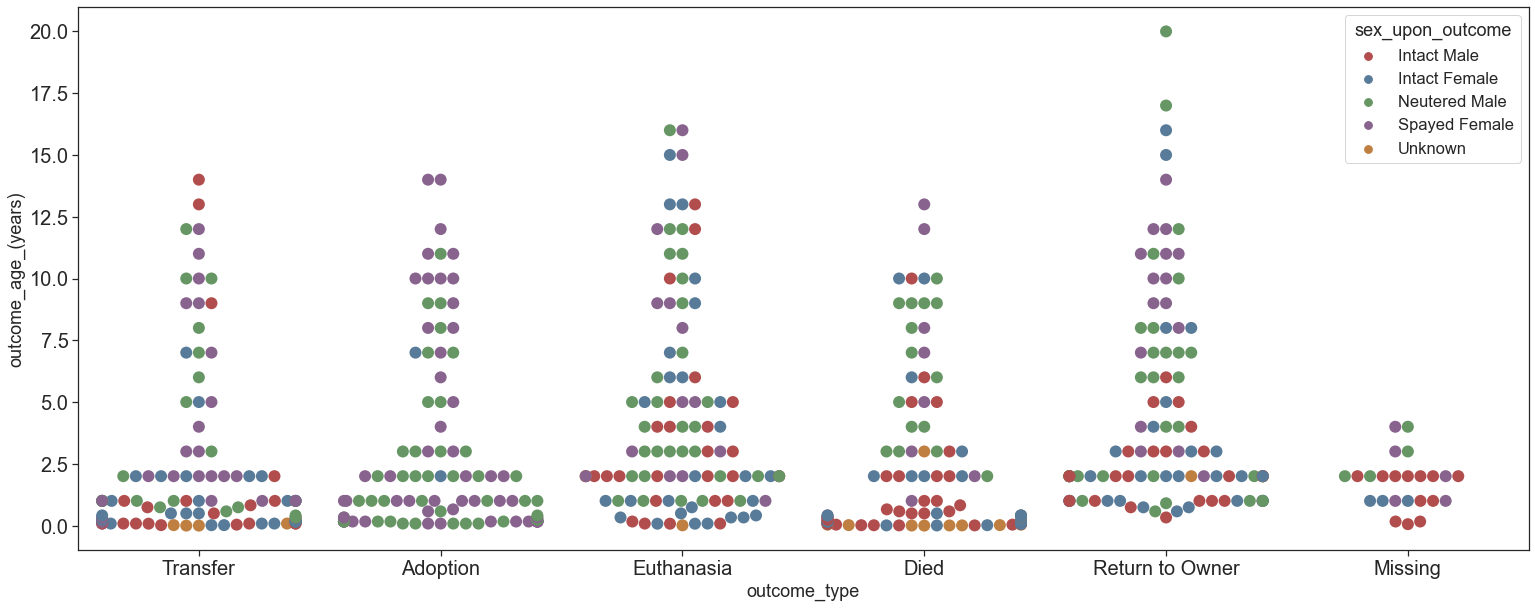

In [196]:
## Sampled data.

dog_outcomes_sample = dogs_df.sample(frac=1.0).groupby(['outcome_type']).head(100)

plt.figure(figsize=(26,10))
g = sns.swarmplot(x='outcome_type', y='outcome_age_(years)', hue='sex_upon_outcome', 
                  data=dog_outcomes_sample, size=12)

g.tick_params(labelsize=20)

From the above, we can ascertain:
* Neutered males and spayed females appear to largely comprise the bulk of the adopted outcome.
* Generally, it looks like most of the dogs are approximately age 15 and under. 

Next, I would like to explore outcome types across time (would be interesting for comparison purposes).

In [197]:
monthyear_outcomes = pd.pivot_table(dogs_df, index=['dob_monthyear'], 
                                    columns=['outcome_type'], values='count', aggfunc=np.sum)
## monthyear_outcomes.index = pd.to_datetime(monthyear_outcomes.index)

## monthyear_outcomes.plot(fontsize=14, linewidth=5, title='Outcomes over Time', figsize=(26,10))

<AxesSubplot:title={'center':'Non-Adoption/Transfer Outcomes over Time'}, xlabel='dob_monthyear'>

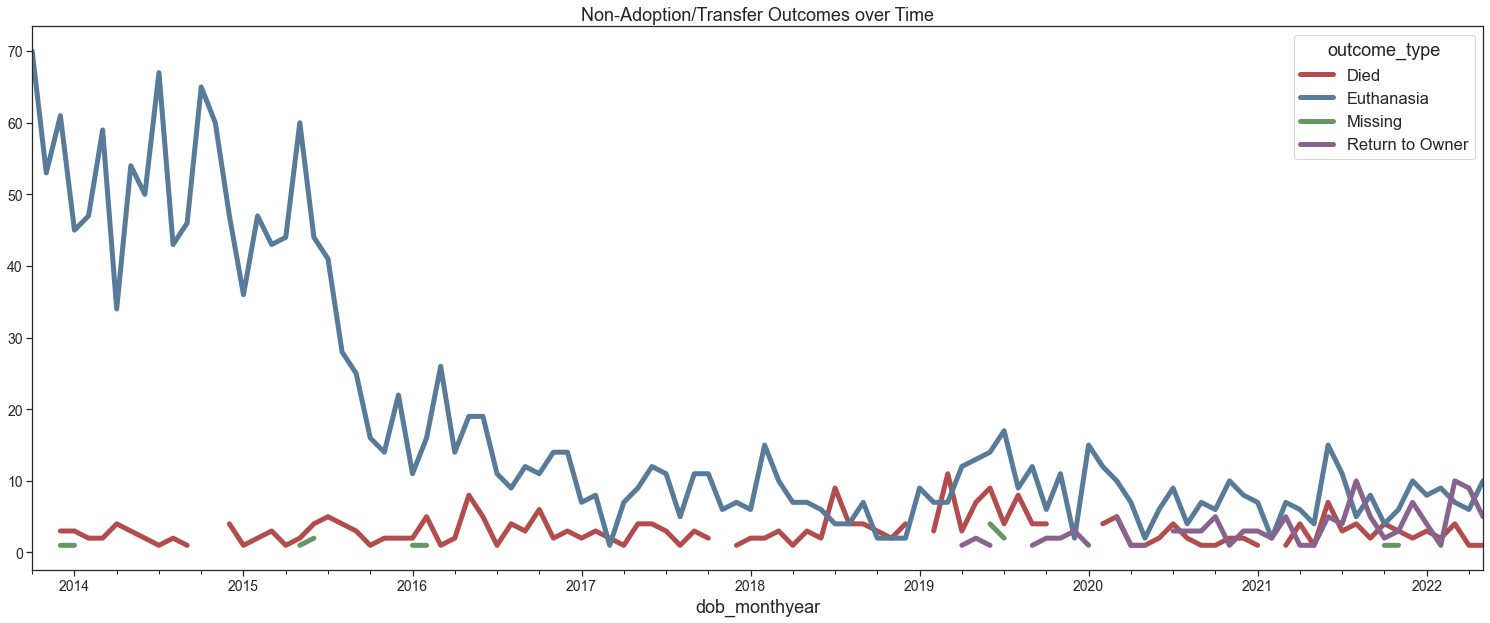

In [198]:
monthyear_outcomes2 = monthyear_outcomes.filter(items=['Died', 'Disposal', 'Euthanasia', 'Missing', 
                                                      'Return to Owner', 'Rto-Adopt'])

monthyear_outcomes2.plot(fontsize=14, linewidth=5, figsize=(26,10), 
                         title='Non-Adoption/Transfer Outcomes over Time')

From the above, we can ascertain:
* Euthanasias have greatly decreased overall across time since pre-2014.
* Lots of deaths, not many missings or return to owners. 

Next, it might be interesting to assess any significant trends or groupings of outcomes based on the age group of the dog and if that changes depending on sex. 

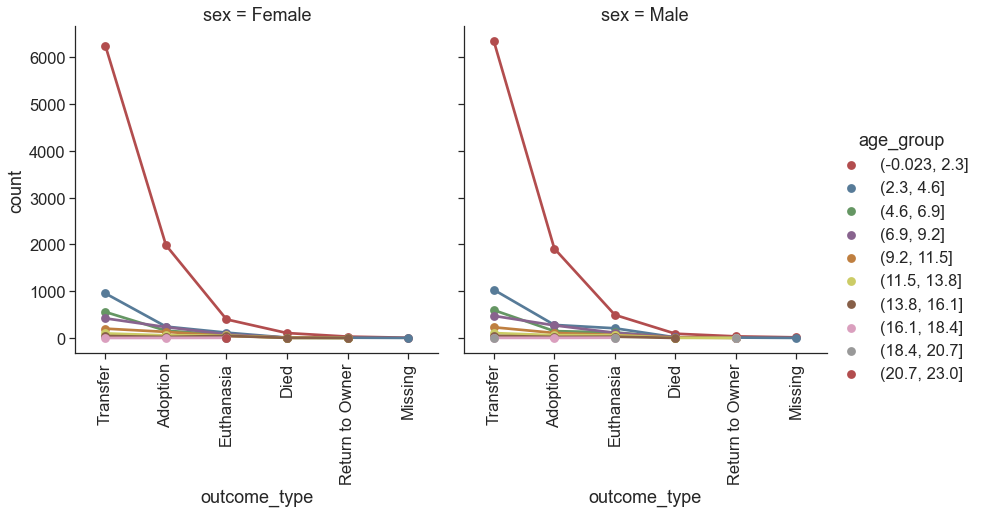

In [199]:
## Looking at outcome type by sex and age.
agegroup_counts = dogs_df.groupby(['age_group', 'sex'])['outcome_type'].value_counts().reset_index(name='count')

g = sns.factorplot(x='outcome_type', y='count', hue='age_group', col='sex',
                   data=agegroup_counts, size=6)

g.set_xticklabels(rotation=90)

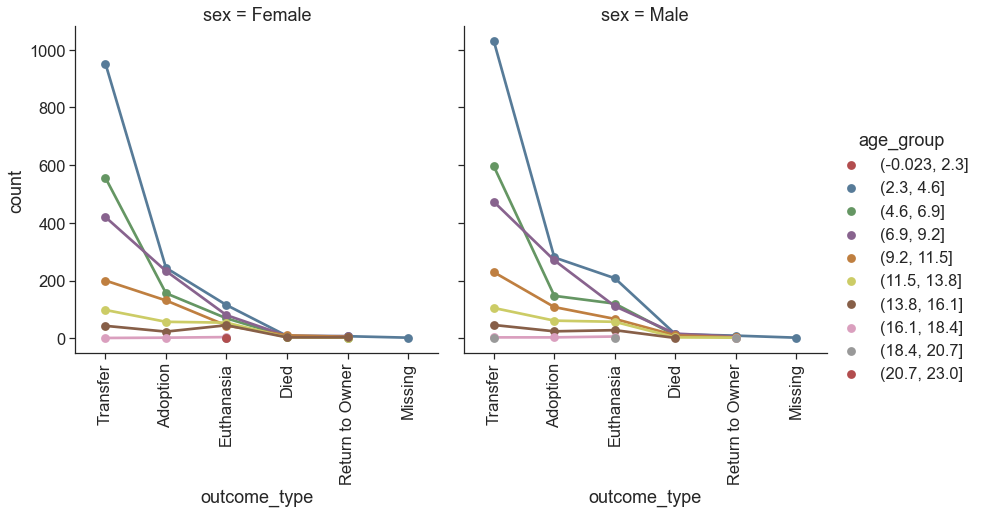

In [200]:
## Looking at outcome type by sex and age.
agegroup_counts2 = agegroup_counts[agegroup_counts['age_group'] != agegroup_counts['age_group'].unique()[0]]

g = sns.factorplot(x='outcome_type', y='count', hue='age_group', col='sex', 
                   data=agegroup_counts2, size=6)

g.set_xticklabels(rotation=90)

From the first graph above, we can ascertain the following:
* Dogs under two years old make up the majority of records.
* There are approximately the same number of female and male dogs within the dataset. 

Since the number of dogs under approximately two years of age skewed the graph a bit, I decided to filter for that and run the EDA again - which is the second graph. From that one:

* Dogs under approximately five years of age make up the majority of records (which was also noted in a previous EDA graph).
* The most common outcomes are adoption or transfer to a partner facility. 

#### Dogs EDA: Conclusions and Summary

Overall, the key findings from the dog-specific EDA lead us to the following:
* Dogs under two years old make up the majority of records.
* There are approximately the same number of female and male dogs within the dataset. 
* Dogs under approximately five years of age make up the majority of records (which was also noted in a previous EDA graph).
* The most common outcomes are adoption or transfer to a partner facility. 
* Euthanasias have greatly decreased overall across time since pre-2014.
* Lots of deaths, not many missings or return to owners. 
* Neutered males and spayed females appear to largely comprise the bulk of the adopted outcome.
* Generally, it looks like most of the dogs are approximately age 15 and under. 
* Neutered and spayed dogs are most often transferred.
* Dogs are adopted more frequently than puppies.
* Most dogs and puppies are transferred to partner facilities.

#### Dogs: Model Preparation & Building

In [201]:
## Import necessary libraries for machine learning. 
## May already have some of these imported above. 

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline, FeatureUnion

import joblib

import warnings
warnings.simplefilter('ignore')

First, I will define a confusion matrix function to call upon later after the model building.

In [202]:
## Define a confusion matrix function - inspired by the confusion matrix info at:
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

I want to view that data again as a refresher.

In [204]:
## View data again.
dogs_df.head(5)

,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,n_previous_stays,count,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),Dog/Puppy (outcome),sex_age_outcome,age_group,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_hour,breed_1,breed_2,2,akc_breed,domestic_breed,coat_pattern,color1,color2,color_1,color_2,coat
0,2013-07-23,Adoption,Dog,Neutered Male,2 months,labrador retriever,black,Foster,0,1,Male,Yes,2,30,60,0.164384,Puppy,Neutered Male Puppy,"(-0.023, 2.3]",2013,7,2013-10,10,2013,9,labrador retriever,None,None,True,False,NaN,black,None,black,None,black
1,2010-09-22,Transfer,Dog,Neutered Male,3 years,toy poodle,white,Partner,0,1,Male,Yes,3,365,1095,3.000000,Dog,Neutered Male Dog,"(2.3, 4.6]",2010,9,2013-10,10,2013,11,toy poodle,None,None,True,False,NaN,white,None,white,None,white
2,2011-09-25,Transfer,Dog,Spayed Female,2 years,boxer,red/white,Partner,0,1,Female,Yes,2,365,730,2.000000,Dog,Spayed Female Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,11,boxer,None,None,True,False,NaN,red,white,red,white,red
3,2012-09-17,Euthanasia,Dog,Neutered Male,1 year,chesa bay retr,red/white,Behavior,0,1,Male,Yes,1,365,365,1.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2012,9,2013-10,10,2013,12,chesa bay retr,None,None,False,True,NaN,red,white,red,white,red
4,2011-09-20,Euthanasia,Dog,Neutered Male,2 years,american bulldog,white/brown,Aggressive,0,1,Male,Yes,2,365,730,2.000000,Dog,Neutered Male Dog,"(-0.023, 2.3]",2011,9,2013-10,10,2013,12,american bulldog,None,None,True,False,brindle,white,brown,white,brown,white


Next, a refresher on outcome types and subtypes.

In [205]:
## Outcome types.
dogs_df['outcome_type'].value_counts()

Transfer           17337
Adoption            5633
Euthanasia          1904
Died                 290
Return to Owner      119
Missing               24
Name: outcome_type, dtype: int64

In [206]:
## Subtype.
dogs_df['outcome_subtype'] = np.where(pd.isnull(dogs_df['outcome_subtype']), 
                                           dogs_df['outcome_type'], 
                                           dogs_df['outcome_subtype'])

In [207]:
## Subtypes.
dogs_df['outcome_subtype'].value_counts()

Partner                16794
Foster                  5296
Suffering                898
Aggressive               568
Out State                528
Offsite                  339
In Kennel                185
Behavior                 159
At Vet                   102
Field                     95
Rabies Risk               95
Medical                   79
In Foster                 53
Court/Investigation       39
Possible Theft            14
Customer S                12
In Surgery                12
Enroute                   11
In State                  11
Prc                        9
Emergency                  4
Emer                       3
Barn                       1
Name: outcome_subtype, dtype: int64

Now I will define the features for training and testing my model.

In [208]:
## Features.
x = dogs_df.filter(items=['sex_upon_outcome', 'breed', 'color', 'coat_pattern', 'n_previous_stays',
                               'domestic_breed', 'dob_month', 'age_group', 'outcome_month', 
                               'outcome_weekday', 'outcome_hour', 'Dog/Puppy (outcome)'])

Next I will define the target variable, which is outcome type.

In [209]:
## Convert to categorical.
## This will be helpful for transforming categorical variables into numeric for model use.
for col in x:
    x[col] = x[col].astype('category')
    
## y = cats_df['outcome_subtype'].astype('category')
y = dogs_df['outcome_type'].astype('category')

The next steps will be continued prep for getting the data ready to feed into the machine learning model.

##### Obtain dummy variables and split the data (train/test).

In [210]:
## Obtain dummy variables.
xd = pd.get_dummies(x)

In [211]:
## Obtain column names for plotting purposes later.
xnames = xd.columns
xarr = np.array(xd)

In [212]:
## yarr, ynames = pd.factorize(cats_df['outcome_subtype'])
yarr, ynames = pd.factorize(dogs_df['outcome_type'])

In [213]:
## Split the data.
x_train, x_test, y_train, y_test = train_test_split(xarr, yarr, 
                                                    test_size=0.3, random_state=1)

In [214]:
## Add a scaler to the train and test sets.

scaler = preprocessing.StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##### Important feature identification.

Now, since I have split the data, I am going to move forward and find important features using random forests. 

In [215]:
## Initiate the classifier.

rf_classifier = RandomForestClassifier(n_estimators=250, criterion='gini', 
                                       class_weight='balanced_subsample', bootstrap=True, oob_score=True)

rf_classifier.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=250,
                       oob_score=True)

<AxesSubplot:xlabel='feature', ylabel='importance'>

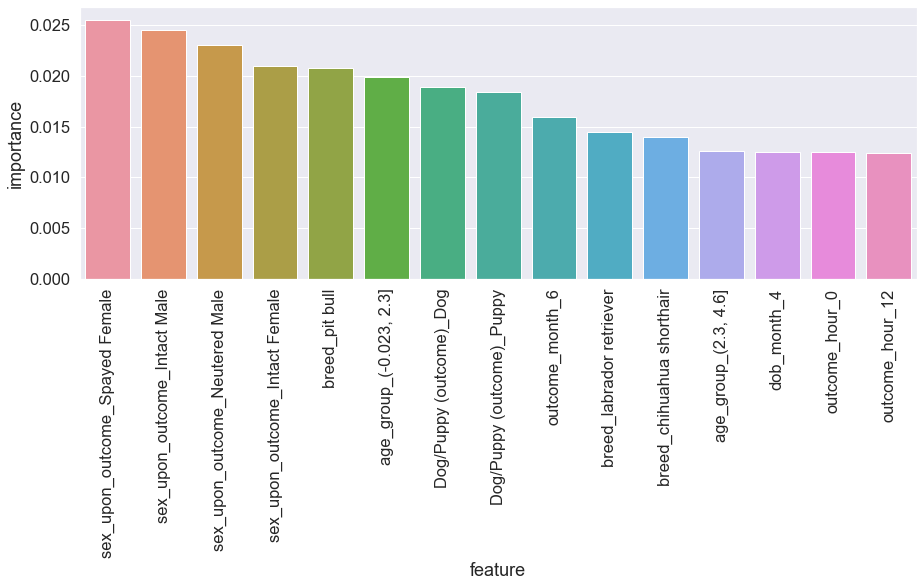

In [216]:
## Extract features and plot them based upon importance. 
feature_importances = rf_classifier.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15])

The above random forest classifier reports that the most important features when predicting a shelter dog adoption, or partner transfer are (in this order):

* Spayed females.
* Intact males (interesting).
* Neutered males.
* Intact females.
* If the breed is a pit bull.
* Under 3 years of age.
* If the dog is an adult dog.
* If the dog is a puppy.
* If the outcome month is June (6 - summer).
* If the breed is a labrador retriever.
* If the breed is a chihuahua.
* If the dog is between the ages of 2 and 5.
* If the dog was born in April (4).
* If the outcome hour was 0 (interesting).
* If the outcome hour was 12.


    
    
Some additional notes and thoughts include:

* It appears that males and females have somewhat equal impact (whether fixed or not).
* Whether dog or puppy, this aids in the prediction process.
* Certain breeds seem to be more important here than in the cat feature identification.

#### Dimension Reduction with PCA

To further improve upon the features to be used in model building, I will conduct dimension reduction using PCA techniques.

In [217]:
## Initiate PCA.
pca = PCA()

## Fit the PCA to the scaled data.
pca.fit(x_train_scaled)

PCA()

In [218]:
## Features.
print(len(pca.components_))

1591


<AxesSubplot:xlabel='components'>

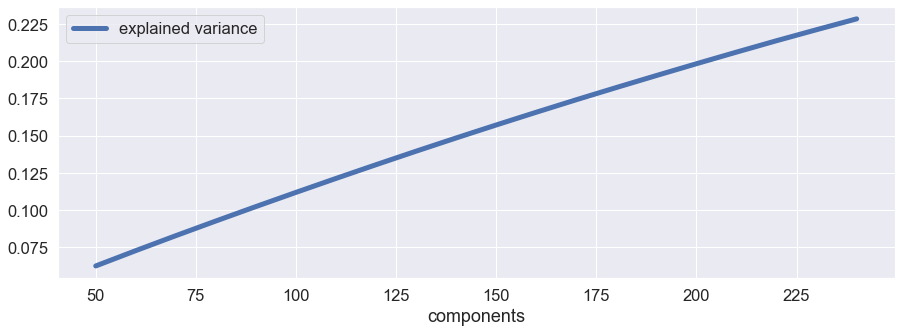

In [219]:
## Plot variance of the components.
comps = np.arange(50, 250, 10)
exp_var = []

for comp in comps:
    exp_var.append(sum(pca.explained_variance_ratio_[0:comp]))
    
pca_exp_var = pd.concat([pd.Series(comps, name='components'), 
                         pd.Series(exp_var, name='explained variance')], axis=1)

pca_exp_var.set_index('components', inplace=True)

pca_exp_var.plot(kind='line', linewidth=5, figsize=(15, 5))

#### Machine Learning Model Building & Predictive Analytics:

For the first model run, I will run the model for all of the possible outcome types. 

In [220]:
## Feature union and model prediction (with pipeline).

feature_union = FeatureUnion([
    ('pca', PCA()),
    ('kbest', SelectKBest())
])

prediction_model = Pipeline([
    ('feature_union', feature_union),
    ('rf', RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                  class_weight='balanced_subsample', bootstrap=True, 
                                  oob_score=True))
])



In [221]:
## Fit the prediction model.
prediction_model.fit(x_train_scaled, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('pca', PCA()),
                                                ('kbest', SelectKBest())])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        n_estimators=1000, oob_score=True))])

In [222]:
## Cross-validation fold.
cv = StratifiedKFold(2)

In [223]:
## CV score and prediction.
cv_score = cross_val_score(prediction_model, x_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_predict_score = cross_val_predict(prediction_model, x_train_scaled, y_train, cv=cv)

In [224]:
## Print out results of scores.
print(cv_score)
print(np.mean(cv_score))

print(accuracy_score(y_train, cv_predict_score))

[0.70543073 0.70339844]
0.7044145873320538
0.7048097549960484


In [225]:
rf_pred = prediction_model.predict(x_test_scaled)

In [226]:
print(accuracy_score(y_test, rf_pred))

0.7193467667588569


The model accuracy comes in at about 71%, which is not as high as I would like, and not as high as the cat model. 

Normalized confusion matrix
Confusion matrix, without normalization


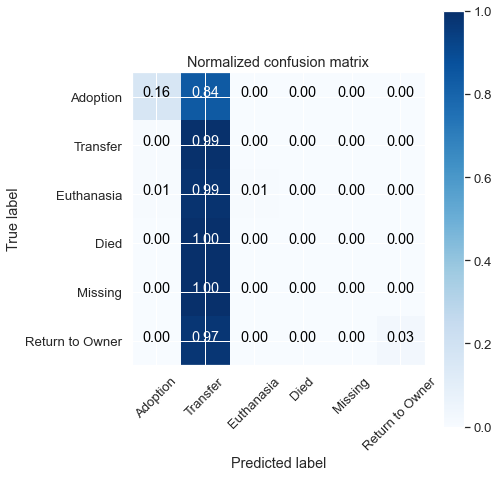

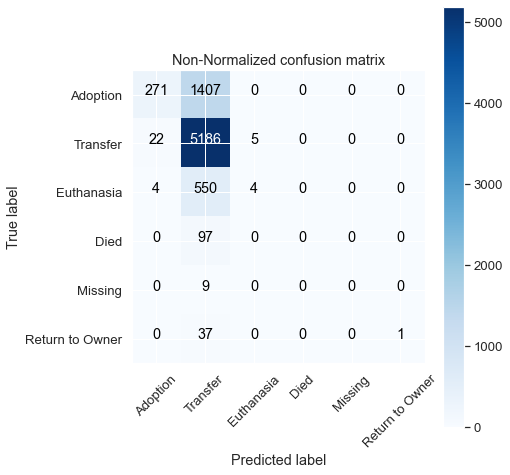

In [227]:
sns.set(font_scale=1.2)

rf_cnf_mat = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(rf_cnf_mat, classes=ynames, normalize=True, title='Normalized confusion matrix')

plt.figure(figsize=(7, 7))
plot_confusion_matrix(rf_cnf_mat, classes=ynames, normalize=False, title='Non-Normalized confusion matrix')

plt.show()

In [228]:
print(classification_report(y_test, rf_pred, target_names=ynames))

                 precision    recall  f1-score   support

       Adoption       0.91      0.16      0.27      1678
       Transfer       0.71      0.99      0.83      5213
     Euthanasia       0.44      0.01      0.01       558
           Died       0.00      0.00      0.00        97
        Missing       0.00      0.00      0.00         9
Return to Owner       1.00      0.03      0.05        38

       accuracy                           0.72      7593
      macro avg       0.51      0.20      0.19      7593
   weighted avg       0.73      0.72      0.63      7593



Next, in an attempt to improve the model a bit, I am going to only run the model with two main potential outcomes - adoption and transfer.

In [294]:
## Clean and prep data.
## Index.
## Using two main types to group all outcome types into two classifications.
dogs_df = dogs_df.loc[(dogs_df['outcome_type'] == 'Adoption') | 
                                (dogs_df['outcome_type'] == 'Transfer')]

In [295]:
## Features.
x = dogs_df.filter(items=['sex_upon_outcome', 'breed', 'color', 'coat_pattern', 'n_previous_stays',
                               'domestic_breed', 'dob_month', 'age_group', 'outcome_month', 
                               'outcome_weekday', 'outcome_hour', 'Dog/Puppy (outcome)'])

In [296]:
## Convert to categorical.
## This will be helpful for transforming categorical variables into numeric for model use.
for col in x:
    x[col] = x[col].astype('category')
    
y = dogs_df['outcome_type'].astype('category')

In [297]:
## Obtain dummy variables.
xd = pd.get_dummies(x)

In [298]:
## Obtain column names for plotting purposes later.
xnames = xd.columns
xarr = np.array(xd)

In [299]:
## yarr, ynames = pd.factorize(cats_df['outcome_subtype'])
yarr, ynames = pd.factorize(dogs_df['outcome_type'])

In [300]:
## Split the data.
x_train, x_test, y_train, y_test = train_test_split(xarr, yarr, 
                                                    test_size=0.3, random_state=1)

In [301]:
## Add a scaler to the train and test sets.
scaler = preprocessing.StandardScaler()


x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [302]:
## Find important features using random forests.
## Initiate the classifier.
rf_classifier = RandomForestClassifier(n_estimators=250, criterion='gini', 
                                       class_weight='balanced_subsample', bootstrap=True, oob_score=True)

In [303]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=250,
                       oob_score=True)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=250,
                       oob_score=True)

In [304]:
## Initiate PCA.
pca = PCA()

## Fit the PCA to the scaled data.
pca.fit(x_train_scaled)

PCA()

In [305]:
print(len(pca.components_))

1530


<AxesSubplot:xlabel='components'>

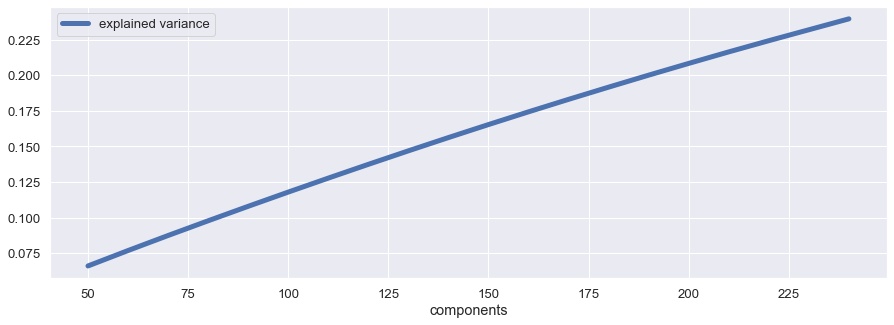

In [306]:
comps = np.arange(50, 250, 10)
exp_var = []

for comp in comps:
    exp_var.append(sum(pca.explained_variance_ratio_[0:comp]))
    
pca_exp_var = pd.concat([pd.Series(comps, name='components'), 
                         pd.Series(exp_var, name='explained variance')], axis=1)

pca_exp_var.set_index('components', inplace=True)

pca_exp_var.plot(kind='line', linewidth=5, figsize=(15, 5))

In [307]:
## Feature union and model prediction.

feature_union = FeatureUnion([
    ('pca', PCA()),
    ('kbest', SelectKBest())
])

prediction_model = Pipeline([
    ('feature_union', feature_union),
    ('rf', RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                  class_weight='balanced_subsample', bootstrap=True, 
                                  oob_score=True))
])



In [308]:
prediction_model.fit(x_train_scaled, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('pca', PCA()),
                                                ('kbest', SelectKBest())])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        n_estimators=1000, oob_score=True))])

In [309]:
## Cross-validation fold.
cv = StratifiedKFold(2)

In [310]:
## CV score and prediction.
cv_score = cross_val_score(prediction_model, x_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_predict_score = cross_val_predict(prediction_model, x_train_scaled, y_train, cv=cv)

In [311]:
## Print out results of scores.
print(cv_score)
print(np.mean(cv_score))

print(accuracy_score(y_train, cv_predict_score))

[0.79689055 0.79363105]
0.795260797950786
0.7947011630076497


In [312]:
rf_pred = prediction_model.predict(x_test_scaled)

In [313]:
print(accuracy_score(y_test, rf_pred))

0.8098969670584821


The model accuracy now comes in at about 80%, which is higher than the previous one. This model accuracy is still lower than the cat model.

Normalized confusion matrix
Confusion matrix, without normalization


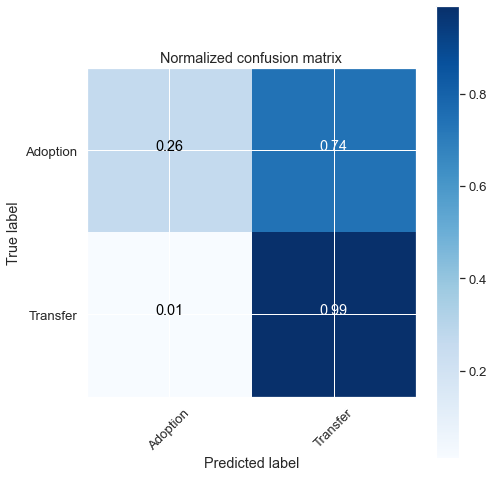

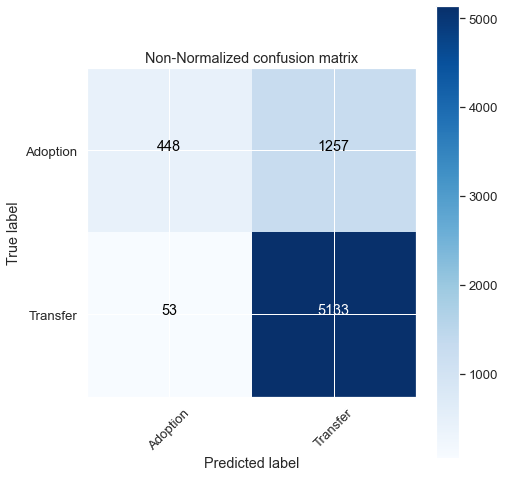

In [314]:
## Confusion matrices.
sns.set(font_scale=1.2)

rf_cnf_mat = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(rf_cnf_mat, classes=ynames, normalize=True, title='Normalized confusion matrix')

plt.figure(figsize=(7, 7))
plot_confusion_matrix(rf_cnf_mat, classes=ynames, normalize=False, title='Non-Normalized confusion matrix')

plt.show()

In [315]:
## Classification report.
print(classification_report(y_test, rf_pred, target_names=ynames))

              precision    recall  f1-score   support

    Adoption       0.89      0.26      0.41      1705
    Transfer       0.80      0.99      0.89      5186

    accuracy                           0.81      6891
   macro avg       0.85      0.63      0.65      6891
weighted avg       0.83      0.81      0.77      6891



### Conclusions & Key Takeaways.

Overall:

    * The dataset is mostly comprised of dogs.
    * The most frequent outcome classification is transfer.
    * Most of the animals at the time of their outcome post-shelter were neutered males.
    * Most animals have not been previously taken into the shelter on a separate occasion.

For cats:

    * Intact males and females of kitten age (six months or less) are transferred more than any other outcome.
        * The result is consistent with general shelter practice as intact cats are generally spayed or neutered before becoming available for adoption.
        * Kittens are more likely to be transferred to partner facilities, perhaps for receiving treatments (spayed/neutered, vaccines, etc.).
    * Neutered/spayed kittens are adopted more frequently than adults.
        * Kittens are typically adopted faster (less time in the shelter) than adult cats.
    * The cats entering the shelter are usually under five years of age.
    * Adoptions and transfers are very seasonal, peaking in the summer months (mid-year) and then dropping back down until the subsequent summer season.
        * Other outcomes such as return to owner, are less seasonal and not as easy to track/glean meaning from across time.
    * There does not appear to be any significant relation in the outcome to the age group of the cat, other than if the cat is of kitten age or not.

For dogs:


    * Dogs under two years old make up the majority of records.
    * There are approximately the same number of female and male dogs within the dataset.
    * Dogs under approximately five years of age make up the majority of records (which was also noted in a previous EDA graph).
    * The most common outcomes are adoption or transfer to a partner facility.
    * Euthanasias have greatly decreased overall across time since pre-2014.
    * Lots of deaths, not many missings or return to owners.
    * Neutered males and spayed females appear to largely comprise the bulk of the adopted outcome.
    * Generally, it looks like most of the dogs are approximately age 15 and under.
    * Neutered and spayed dogs are most often transferred.
    * Dogs are adopted more frequently than puppies.
    * Most dogs and puppies are transferred to partner facilities.

With respect to the machine learning models:

* For cats: Initially, I built a model looking at all of the outcome types versus just adoption and transfer. I thought that by doing so, it would be a more detailed look at the data, and thus provide potentially better outcomes, but I found the opposite to be true. The first model only had a predicted accuracy of approximately 81%; the second increased that number by ten percentage points, coming in at about 91% predicated accuracy.
* For dogs: The initial model was about 71% accurate, with the second one being about 81% accuracy.
* Overall, the second models were an improvement, for both cats and dogs.
* I wanted to implement some hyperparameter tuning to see if I could improve my models even further, but given the amount of data and amount of time, this merely did not end up being feasible. This portion of "code-running" could not even be completed within a six-hour timeframe, and I am not sure just how long it would have taken. In the end, with the time, scope, and current experience/skills I possess, I elected to forgo this step, as I did not deem it to be overly fruitful. However, that is a piece of this process that could be implemented in future endeavors with this project.

Lastly, we can ascertain that these models could prove to be helpful for the animal shelter, as far as identifying outcomes, and making decisions based on that - either to further improve outcomes, or to prepare and plan according to what the outcome predictions indicate.

#### Next Steps: Testing the Models: "Real-Life" Edition

One of the limitations of this project is that I did not split the data according to date in order to test the models. Since the data is streaming, an additional step moving forward could be to split the data at a certain time point, and then see how well the model did relative to the actual data used for the testing portion/split.